In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow import keras


In [2]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_excel('PruebaTG_v2.xlsx')

In [7]:

df = df.drop(0)
df = df.reset_index(drop= True)

In [8]:
dups = df.pivot_table(index = ['Diagnosis'], aggfunc ='size') 
  
print(dups) 

Diagnosis
diabetes       668
healthy        441
intolerance    865
dtype: int64


In [9]:
#sano 0, intolerate a la glucosa = 1, prediabetes 2, diabetes = 3

df['Diagnosis'] = df['Diagnosis'].replace({'healthy' : 0}, regex=True)

In [10]:
df['Diagnosis'] = df['Diagnosis'].replace({'prediabetes' : 2}, regex=True)

In [11]:
df['Diagnosis'] = df['Diagnosis'].replace({'intolerance' : 1}, regex=True)


In [12]:
df['Diagnosis'] = df['Diagnosis'].replace({'diabetes' : 2}, regex=True)


In [13]:
from sklearn.model_selection import train_test_split 

train, test = train_test_split(df, test_size = 0.30, random_state = 100)

print("Examples used for training: ", len(train))
print("Examples used for test: ", len(test))

Examples used for training:  1381
Examples used for test:  593


In [14]:
#patients = df.drop(["Paciente","Edad","Diagnostico","Basal"], axis=1)
patients = df.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_train = train.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
p_test = test.drop(["Patient","age","Basal",'Diagnosis'], axis=1)
#patients = patients.drop(0)
p_train.head(5)


,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,...,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303
545,70.013398,70.099281,70.310719,70.683925,71.242275,71.998571,72.959478,74.124148,75.486303,77.039402,...,113.144839,112.855551,112.568042,112.282307,111.998337,111.716125,111.435664,111.156945,110.879959,110.604700
1286,99.326902,98.643168,98.049814,97.567919,97.213219,96.996921,96.926422,97.005887,97.236775,97.618391,...,132.713109,132.452772,132.194010,131.936818,131.681190,131.427120,131.174602,130.923631,130.674201,130.426308
438,69.569336,69.162807,68.856940,68.668936,68.607480,68.675065,68.869861,69.186851,69.619011,70.158178,...,91.607970,91.476853,91.346337,91.216420,91.087100,90.958376,90.830246,90.702707,90.575758,90.449397
1202,100.001976,100.014997,100.048060,100.108305,100.201347,100.331566,100.502297,100.716048,100.974581,101.279121,...,137.890610,137.620184,137.351102,137.083366,136.816978,136.551939,136.288252,136.025917,135.764937,135.505311
949,88.904965,87.942021,87.276298,86.898256,86.781386,86.895307,87.210217,87.700239,88.342159,89.116041,...,148.575320,148.236815,147.899187,147.562490,147.226851,146.892187,146.558443,146.225671,145.893947,145.563210


<hr>

In [15]:
s = patients.shape
s[1]
x = [i for i in range(0,s[1],30)]
x


[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [16]:
a = [patients.iloc[:,i] for i in range(0,s[1],30)]
x_test = [p_test.iloc[:,i] for i in range(0,s[1],30)]
x_train = [p_train.iloc[:,i] for i in range(0,s[1],30)]
a = np.array(a).T
x_train = np.array(x_train).T
x_test = np.array(x_test).T

x_test.shape


(593, 10)

In [17]:
labels = df[['Diagnosis']]
labels_train = train[['Diagnosis']]
labels_test = test[['Diagnosis']]
#labels = labels.drop(0)
labels_train.head(20)

,Diagnosis
545,1
1286,2
438,0
1202,1
949,1
533,1
1293,1
64,1
202,2
480,2


<hr>

In [18]:
import matplotlib.pyplot as plt

In [19]:
import numpy as np
#a = np.zeros((len(labels), 300))

In [20]:
#for i in range(0, len(labels)):
  #a[i,:]= patients.loc[i,:].to_numpy().T

In [21]:
y_train = labels_train.to_numpy()
y_test = labels_test.to_numpy()

In [22]:
y_train = keras.utils.to_categorical(y_train, 3)#numero de clases
y_test = keras.utils.to_categorical(y_test, 3)

In [23]:
y_train

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [24]:
a
l = labels.to_numpy()


In [25]:
a.shape

(1974, 10)

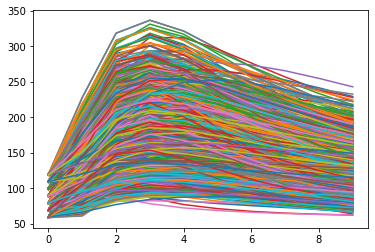

In [26]:
for i in range(0, len(y_train)):
  plt.plot(x_train[i,:])
plt.show()

In [27]:
#a = a.reshape(a.shape[0], 10, 1)
l=labels.to_numpy()
#l = l.reshape(a.shape[0], 3, 1)
len(np.unique(l))

3

In [28]:
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270]

In [29]:

a.shape

(1974, 10)

#Normalize


In [30]:
from tensorflow import keras

a = a.astype('float32')
#x_test = x_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
a /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape, 'l')

x_train shape: (1381, 10)
1381 train samples
593 test samples
(1381, 3) l


#Neuronal network CNN

In [31]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [32]:
type(l)

numpy.ndarray

In [33]:
l.shape

(1974, 1)

In [34]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [35]:
num_classes = y_train.shape[1]#len(np.unique(y_train))

In [36]:
num_classes

3

In [37]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [38]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [39]:
x_train.shape
y_train.shape

(1381, 3)

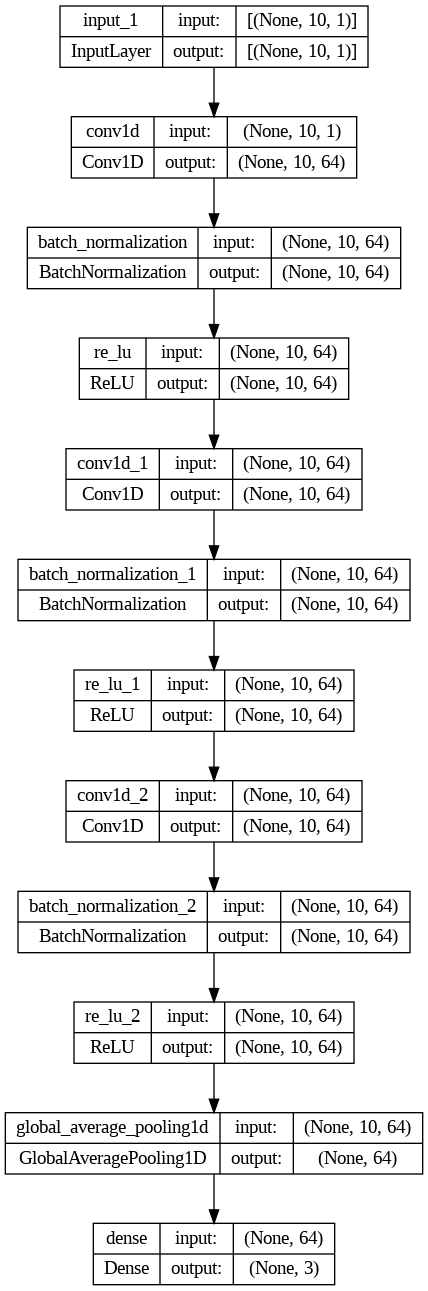

In [40]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)
    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

In [41]:
epochs = 1000
batch_size = 64

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss='mean_squared_error',
    metrics=['accuracy']
)
#metrics=['categorical_crossentropy'],
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    callbacks=callbacks,
)
##le movi al callback
#history = model.fit(
#    x_train,
 #   y_train,
#    batch_size=batch_size,
#    epochs=epochs,
#    callbacks=callbacks,
#    validation_split=0.2,
#    verbose=1,
#)

Epoch 1/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0745 - accuracy: 0.8413

44/44 [==============================] - 2s 7ms/step - loss: 0.0713 - accuracy: 0.8487 - lr: 0.0010
Epoch 2/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0569 - accuracy: 0.8801

44/44 [==============================] - 0s 8ms/step - loss: 0.0577 - accuracy: 0.8783 - lr: 0.0010
Epoch 3/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0617 - accuracy: 0.8703

44/44 [==============================] - 0s 9ms/step - loss: 0.0593 - accuracy: 0.8762 - lr: 0.0010
Epoch 4/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0461 - accuracy: 0.9054

44/44 [==============================] - 0s 9ms/step - loss: 0.0483 - accuracy: 0.9015 - lr: 0.0010
Epoch 5/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0507 - accuracy: 0.8961

44/44 [==============================] - 0s 7ms/step - loss: 0.0528 - accuracy: 0.8921 - lr: 0.0010
Epoch 6/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0479 - accuracy: 0.9000

44/44 [==============================] - 0s 9ms/step - loss: 0.0489 - accuracy: 0.8965 - lr: 0.0010
Epoch 7/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0469 - accuracy: 0.8953

44/44 [==============================] - 1s 14ms/step - loss: 0.0467 - accuracy: 0.8957 - lr: 0.0010
Epoch 8/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0481 - accuracy: 0.9048

44/44 [==============================] - 1s 13ms/step - loss: 0.0482 - accuracy: 0.9030 - lr: 0.0010
Epoch 9/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0456 - accuracy: 0.9062

44/44 [==============================] - 1s 13ms/step - loss: 0.0456 - accuracy: 0.9073 - lr: 0.0010
Epoch 10/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0498 - accuracy: 0.8953

44/44 [==============================] - 1s 11ms/step - loss: 0.0505 - accuracy: 0.8936 - lr: 0.0010
Epoch 11/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0486 - accuracy: 0.9012

44/44 [==============================] - 1s 13ms/step - loss: 0.0485 - accuracy: 0.9015 - lr: 0.0010
Epoch 12/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0470 - accuracy: 0.9005

44/44 [==============================] - 0s 9ms/step - loss: 0.0484 - accuracy: 0.8979 - lr: 0.0010
Epoch 13/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0457 - accuracy: 0.8980

44/44 [==============================] - 0s 7ms/step - loss: 0.0457 - accuracy: 0.9001 - lr: 0.0010
Epoch 14/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0418 - accuracy: 0.9079

44/44 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 0.9073 - lr: 0.0010
Epoch 15/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0412 - accuracy: 0.9186

44/44 [==============================] - 0s 8ms/step - loss: 0.0415 - accuracy: 0.9196 - lr: 0.0010
Epoch 16/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0454 - accuracy: 0.9070

44/44 [==============================] - 0s 7ms/step - loss: 0.0464 - accuracy: 0.9044 - lr: 0.0010
Epoch 17/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0438 - accuracy: 0.9046

44/44 [==============================] - 0s 7ms/step - loss: 0.0446 - accuracy: 0.9037 - lr: 0.0010
Epoch 18/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0466 - accuracy: 0.9048

44/44 [==============================] - 0s 8ms/step - loss: 0.0467 - accuracy: 0.9044 - lr: 0.0010
Epoch 19/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0474 - accuracy: 0.8968

44/44 [==============================] - 0s 8ms/step - loss: 0.0489 - accuracy: 0.8943 - lr: 0.0010
Epoch 20/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0458 - accuracy: 0.9062

44/44 [==============================] - 0s 8ms/step - loss: 0.0470 - accuracy: 0.9044 - lr: 0.0010
Epoch 21/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0501 - accuracy: 0.8971

44/44 [==============================] - 0s 9ms/step - loss: 0.0509 - accuracy: 0.8957 - lr: 0.0010
Epoch 22/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0418 - accuracy: 0.9143

44/44 [==============================] - 0s 7ms/step - loss: 0.0415 - accuracy: 0.9146 - lr: 0.0010
Epoch 23/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0429 - accuracy: 0.9167

44/44 [==============================] - 0s 7ms/step - loss: 0.0435 - accuracy: 0.9153 - lr: 0.0010
Epoch 24/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0463 - accuracy: 0.8973

44/44 [==============================] - 1s 16ms/step - loss: 0.0462 - accuracy: 0.8972 - lr: 0.0010
Epoch 25/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0422 - accuracy: 0.9121

44/44 [==============================] - 1s 15ms/step - loss: 0.0427 - accuracy: 0.9109 - lr: 0.0010
Epoch 26/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0500 - accuracy: 0.8970

44/44 [==============================] - 0s 9ms/step - loss: 0.0498 - accuracy: 0.8979 - lr: 0.0010
Epoch 27/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0450 - accuracy: 0.9062

44/44 [==============================] - 0s 8ms/step - loss: 0.0462 - accuracy: 0.9044 - lr: 0.0010
Epoch 28/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0419 - accuracy: 0.9167

44/44 [==============================] - 0s 9ms/step - loss: 0.0445 - accuracy: 0.9109 - lr: 0.0010
Epoch 29/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0459 - accuracy: 0.9070

44/44 [==============================] - 0s 8ms/step - loss: 0.0472 - accuracy: 0.9044 - lr: 0.0010
Epoch 30/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0437 - accuracy: 0.9125

44/44 [==============================] - 0s 9ms/step - loss: 0.0432 - accuracy: 0.9124 - lr: 0.0010
Epoch 31/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0485 - accuracy: 0.9062

44/44 [==============================] - 0s 7ms/step - loss: 0.0485 - accuracy: 0.9059 - lr: 0.0010
Epoch 32/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0456 - accuracy: 0.9055

44/44 [==============================] - 0s 7ms/step - loss: 0.0457 - accuracy: 0.9059 - lr: 0.0010
Epoch 33/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0467 - accuracy: 0.9087

44/44 [==============================] - 0s 8ms/step - loss: 0.0451 - accuracy: 0.9124 - lr: 0.0010
Epoch 34/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0456 - accuracy: 0.9062

44/44 [==============================] - 0s 7ms/step - loss: 0.0459 - accuracy: 0.9051 - lr: 0.0010
Epoch 35/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0433 - accuracy: 0.9078

44/44 [==============================] - 0s 7ms/step - loss: 0.0461 - accuracy: 0.9030 - lr: 0.0010
Epoch 36/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0413 - accuracy: 0.9195

44/44 [==============================] - 0s 7ms/step - loss: 0.0433 - accuracy: 0.9153 - lr: 0.0010
Epoch 37/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0471 - accuracy: 0.9014

44/44 [==============================] - 0s 7ms/step - loss: 0.0487 - accuracy: 0.8972 - lr: 0.0010
Epoch 38/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0362 - accuracy: 0.9268

44/44 [==============================] - 0s 7ms/step - loss: 0.0361 - accuracy: 0.9276 - lr: 0.0010
Epoch 39/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0442 - accuracy: 0.9079

44/44 [==============================] - 0s 11ms/step - loss: 0.0463 - accuracy: 0.9044 - lr: 0.0010
Epoch 40/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.9062

44/44 [==============================] - 1s 12ms/step - loss: 0.0434 - accuracy: 0.9051 - lr: 0.0010
Epoch 41/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0462 - accuracy: 0.9019

44/44 [==============================] - 1s 13ms/step - loss: 0.0460 - accuracy: 0.9022 - lr: 0.0010
Epoch 42/1000
44/44 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9109

44/44 [==============================] - 1s 12ms/step - loss: 0.0433 - accuracy: 0.9109 - lr: 0.0010
Epoch 43/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0443 - accuracy: 0.8996

44/44 [==============================] - 1s 13ms/step - loss: 0.0442 - accuracy: 0.9001 - lr: 0.0010
Epoch 44/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0439 - accuracy: 0.9040

44/44 [==============================] - 1s 13ms/step - loss: 0.0448 - accuracy: 0.9022 - lr: 0.0010
Epoch 45/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0447 - accuracy: 0.9000

44/44 [==============================] - 0s 10ms/step - loss: 0.0440 - accuracy: 0.9030 - lr: 0.0010
Epoch 46/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0368 - accuracy: 0.9263

44/44 [==============================] - 0s 7ms/step - loss: 0.0386 - accuracy: 0.9225 - lr: 0.0010
Epoch 47/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0465 - accuracy: 0.9038

44/44 [==============================] - 0s 7ms/step - loss: 0.0440 - accuracy: 0.9095 - lr: 0.0010
Epoch 48/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0438 - accuracy: 0.9162

44/44 [==============================] - 0s 7ms/step - loss: 0.0439 - accuracy: 0.9153 - lr: 0.0010
Epoch 49/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0393 - accuracy: 0.9219

44/44 [==============================] - 0s 7ms/step - loss: 0.0400 - accuracy: 0.9196 - lr: 0.0010
Epoch 50/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0413 - accuracy: 0.9117

44/44 [==============================] - 0s 7ms/step - loss: 0.0409 - accuracy: 0.9124 - lr: 0.0010
Epoch 51/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0397 - accuracy: 0.9239

44/44 [==============================] - 0s 7ms/step - loss: 0.0388 - accuracy: 0.9232 - lr: 0.0010
Epoch 52/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0417 - accuracy: 0.9100

44/44 [==============================] - 0s 8ms/step - loss: 0.0433 - accuracy: 0.9059 - lr: 0.0010
Epoch 53/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0395 - accuracy: 0.9207

44/44 [==============================] - 0s 9ms/step - loss: 0.0371 - accuracy: 0.9269 - lr: 0.0010
Epoch 54/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0389 - accuracy: 0.9207

44/44 [==============================] - 0s 9ms/step - loss: 0.0389 - accuracy: 0.9218 - lr: 0.0010
Epoch 55/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0351 - accuracy: 0.9271

44/44 [==============================] - 0s 8ms/step - loss: 0.0356 - accuracy: 0.9269 - lr: 0.0010
Epoch 56/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0391 - accuracy: 0.9111

44/44 [==============================] - 0s 8ms/step - loss: 0.0414 - accuracy: 0.9073 - lr: 0.0010
Epoch 57/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0389 - accuracy: 0.9120

44/44 [==============================] - 0s 9ms/step - loss: 0.0400 - accuracy: 0.9117 - lr: 0.0010
Epoch 58/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9062

44/44 [==============================] - 0s 8ms/step - loss: 0.0424 - accuracy: 0.9059 - lr: 0.0010
Epoch 59/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0418 - accuracy: 0.9164

44/44 [==============================] - 0s 9ms/step - loss: 0.0424 - accuracy: 0.9167 - lr: 0.0010
Epoch 60/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0439 - accuracy: 0.9087

44/44 [==============================] - 0s 9ms/step - loss: 0.0424 - accuracy: 0.9109 - lr: 0.0010
Epoch 61/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0389 - accuracy: 0.9187

44/44 [==============================] - 0s 7ms/step - loss: 0.0411 - accuracy: 0.9138 - lr: 0.0010
Epoch 62/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0365 - accuracy: 0.9199

44/44 [==============================] - 0s 7ms/step - loss: 0.0391 - accuracy: 0.9138 - lr: 0.0010
Epoch 63/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0376 - accuracy: 0.9287

44/44 [==============================] - 0s 7ms/step - loss: 0.0416 - accuracy: 0.9211 - lr: 0.0010
Epoch 64/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0379 - accuracy: 0.9273

44/44 [==============================] - 0s 7ms/step - loss: 0.0370 - accuracy: 0.9298 - lr: 0.0010
Epoch 65/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0429 - accuracy: 0.9085

44/44 [==============================] - 0s 7ms/step - loss: 0.0428 - accuracy: 0.9102 - lr: 0.0010
Epoch 66/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0359 - accuracy: 0.9231

44/44 [==============================] - 0s 7ms/step - loss: 0.0385 - accuracy: 0.9189 - lr: 0.0010
Epoch 67/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0385 - accuracy: 0.9169

44/44 [==============================] - 0s 8ms/step - loss: 0.0381 - accuracy: 0.9182 - lr: 0.0010
Epoch 68/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0337 - accuracy: 0.9306

44/44 [==============================] - 0s 8ms/step - loss: 0.0343 - accuracy: 0.9290 - lr: 0.0010
Epoch 69/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0465 - accuracy: 0.9012

44/44 [==============================] - 0s 9ms/step - loss: 0.0445 - accuracy: 0.9073 - lr: 0.0010
Epoch 70/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0437 - accuracy: 0.9062

44/44 [==============================] - 0s 8ms/step - loss: 0.0421 - accuracy: 0.9109 - lr: 0.0010
Epoch 71/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0393 - accuracy: 0.9164

44/44 [==============================] - 0s 8ms/step - loss: 0.0393 - accuracy: 0.9167 - lr: 0.0010
Epoch 72/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0367 - accuracy: 0.9237

44/44 [==============================] - 0s 8ms/step - loss: 0.0377 - accuracy: 0.9218 - lr: 0.0010
Epoch 73/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0360 - accuracy: 0.9249

44/44 [==============================] - 0s 9ms/step - loss: 0.0358 - accuracy: 0.9254 - lr: 0.0010
Epoch 74/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.9077

44/44 [==============================] - 1s 12ms/step - loss: 0.0440 - accuracy: 0.9073 - lr: 0.0010
Epoch 75/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0417 - accuracy: 0.9116

44/44 [==============================] - 1s 12ms/step - loss: 0.0408 - accuracy: 0.9124 - lr: 0.0010
Epoch 76/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0404 - accuracy: 0.9215

44/44 [==============================] - 1s 13ms/step - loss: 0.0405 - accuracy: 0.9211 - lr: 0.0010
Epoch 77/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0382 - accuracy: 0.9215

44/44 [==============================] - 1s 13ms/step - loss: 0.0382 - accuracy: 0.9218 - lr: 0.0010
Epoch 78/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0310 - accuracy: 0.9338

44/44 [==============================] - 1s 13ms/step - loss: 0.0324 - accuracy: 0.9312 - lr: 0.0010
Epoch 79/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0403 - accuracy: 0.9192

44/44 [==============================] - 0s 11ms/step - loss: 0.0414 - accuracy: 0.9182 - lr: 0.0010
Epoch 80/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0364 - accuracy: 0.9243

44/44 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 0.9196 - lr: 0.0010
Epoch 81/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0365 - accuracy: 0.9258

44/44 [==============================] - 0s 8ms/step - loss: 0.0361 - accuracy: 0.9269 - lr: 0.0010
Epoch 82/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0434 - accuracy: 0.9032

44/44 [==============================] - 0s 8ms/step - loss: 0.0442 - accuracy: 0.9015 - lr: 0.0010
Epoch 83/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0284 - accuracy: 0.9436

44/44 [==============================] - 0s 8ms/step - loss: 0.0292 - accuracy: 0.9421 - lr: 0.0010
Epoch 84/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0340 - accuracy: 0.9336

44/44 [==============================] - 0s 7ms/step - loss: 0.0342 - accuracy: 0.9327 - lr: 0.0010
Epoch 85/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0352 - accuracy: 0.9312

44/44 [==============================] - 0s 7ms/step - loss: 0.0353 - accuracy: 0.9305 - lr: 0.0010
Epoch 86/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0332 - accuracy: 0.9305

44/44 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9312 - lr: 0.0010
Epoch 87/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0384 - accuracy: 0.9182

44/44 [==============================] - 0s 8ms/step - loss: 0.0382 - accuracy: 0.9196 - lr: 0.0010
Epoch 88/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0406 - accuracy: 0.9086

44/44 [==============================] - 0s 9ms/step - loss: 0.0394 - accuracy: 0.9131 - lr: 0.0010
Epoch 89/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0414 - accuracy: 0.9148

44/44 [==============================] - 0s 9ms/step - loss: 0.0398 - accuracy: 0.9196 - lr: 0.0010
Epoch 90/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0422 - accuracy: 0.9133

44/44 [==============================] - 0s 8ms/step - loss: 0.0447 - accuracy: 0.9051 - lr: 0.0010
Epoch 91/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0365 - accuracy: 0.9250

44/44 [==============================] - 0s 9ms/step - loss: 0.0358 - accuracy: 0.9254 - lr: 0.0010
Epoch 92/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0317 - accuracy: 0.9405

44/44 [==============================] - 0s 8ms/step - loss: 0.0321 - accuracy: 0.9406 - lr: 0.0010
Epoch 93/1000
44/44 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9146

44/44 [==============================] - 0s 8ms/step - loss: 0.0417 - accuracy: 0.9146 - lr: 0.0010
Epoch 94/1000
44/44 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9261

44/44 [==============================] - 0s 9ms/step - loss: 0.0349 - accuracy: 0.9261 - lr: 0.0010
Epoch 95/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0388 - accuracy: 0.9215

44/44 [==============================] - 0s 8ms/step - loss: 0.0395 - accuracy: 0.9203 - lr: 0.0010
Epoch 96/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0329 - accuracy: 0.9329

44/44 [==============================] - 0s 8ms/step - loss: 0.0339 - accuracy: 0.9305 - lr: 0.0010
Epoch 97/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0406 - accuracy: 0.9191

44/44 [==============================] - 0s 9ms/step - loss: 0.0383 - accuracy: 0.9240 - lr: 0.0010
Epoch 98/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0344 - accuracy: 0.9297

44/44 [==============================] - 0s 8ms/step - loss: 0.0348 - accuracy: 0.9283 - lr: 0.0010
Epoch 99/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0347 - accuracy: 0.9311

44/44 [==============================] - 0s 9ms/step - loss: 0.0375 - accuracy: 0.9225 - lr: 0.0010
Epoch 100/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0362 - accuracy: 0.9211

44/44 [==============================] - 0s 9ms/step - loss: 0.0372 - accuracy: 0.9182 - lr: 0.0010
Epoch 101/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0366 - accuracy: 0.9295

44/44 [==============================] - 0s 8ms/step - loss: 0.0368 - accuracy: 0.9283 - lr: 0.0010
Epoch 102/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0360 - accuracy: 0.9250

44/44 [==============================] - 0s 9ms/step - loss: 0.0354 - accuracy: 0.9276 - lr: 0.0010
Epoch 103/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0371 - accuracy: 0.9230

44/44 [==============================] - 0s 8ms/step - loss: 0.0384 - accuracy: 0.9189 - lr: 0.0010
Epoch 104/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0346 - accuracy: 0.9241

44/44 [==============================] - 0s 8ms/step - loss: 0.0354 - accuracy: 0.9240 - lr: 0.0010
Epoch 105/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9426

44/44 [==============================] - 0s 8ms/step - loss: 0.0310 - accuracy: 0.9421 - lr: 0.0010
Epoch 106/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0369 - accuracy: 0.9291

44/44 [==============================] - 1s 12ms/step - loss: 0.0362 - accuracy: 0.9319 - lr: 0.0010
Epoch 107/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0411 - accuracy: 0.9157

44/44 [==============================] - 1s 13ms/step - loss: 0.0409 - accuracy: 0.9160 - lr: 0.0010
Epoch 108/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0343 - accuracy: 0.9323

44/44 [==============================] - 1s 13ms/step - loss: 0.0345 - accuracy: 0.9319 - lr: 0.0010
Epoch 109/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9353

44/44 [==============================] - 1s 13ms/step - loss: 0.0330 - accuracy: 0.9356 - lr: 0.0010
Epoch 110/1000
44/44 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9189

44/44 [==============================] - 1s 12ms/step - loss: 0.0387 - accuracy: 0.9189 - lr: 0.0010
Epoch 111/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0394 - accuracy: 0.9195

44/44 [==============================] - 1s 13ms/step - loss: 0.0390 - accuracy: 0.9189 - lr: 0.0010
Epoch 112/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0404 - accuracy: 0.9177

44/44 [==============================] - 0s 8ms/step - loss: 0.0406 - accuracy: 0.9167 - lr: 0.0010
Epoch 113/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0327 - accuracy: 0.9353

44/44 [==============================] - 0s 8ms/step - loss: 0.0330 - accuracy: 0.9348 - lr: 0.0010
Epoch 114/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0255 - accuracy: 0.9548

44/44 [==============================] - 0s 7ms/step - loss: 0.0247 - accuracy: 0.9551 - lr: 0.0010
Epoch 115/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0344 - accuracy: 0.9319

44/44 [==============================] - 0s 8ms/step - loss: 0.0333 - accuracy: 0.9334 - lr: 0.0010
Epoch 116/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0391 - accuracy: 0.9157

44/44 [==============================] - 0s 8ms/step - loss: 0.0390 - accuracy: 0.9160 - lr: 0.0010
Epoch 117/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0401 - accuracy: 0.9135

44/44 [==============================] - 0s 7ms/step - loss: 0.0400 - accuracy: 0.9138 - lr: 0.0010
Epoch 118/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0398 - accuracy: 0.9156

44/44 [==============================] - 0s 7ms/step - loss: 0.0403 - accuracy: 0.9146 - lr: 0.0010
Epoch 119/1000
44/44 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.9138

44/44 [==============================] - 0s 8ms/step - loss: 0.0402 - accuracy: 0.9138 - lr: 0.0010
Epoch 120/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0311 - accuracy: 0.9391

44/44 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.9370 - lr: 0.0010
Epoch 121/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0304 - accuracy: 0.9383

44/44 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.9363 - lr: 0.0010
Epoch 122/1000
44/44 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9363

44/44 [==============================] - 0s 8ms/step - loss: 0.0304 - accuracy: 0.9363 - lr: 0.0010
Epoch 123/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0374 - accuracy: 0.9239

44/44 [==============================] - 0s 7ms/step - loss: 0.0362 - accuracy: 0.9276 - lr: 0.0010
Epoch 124/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0341 - accuracy: 0.9336

44/44 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.9348 - lr: 0.0010
Epoch 125/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0360 - accuracy: 0.9194

44/44 [==============================] - 0s 9ms/step - loss: 0.0368 - accuracy: 0.9182 - lr: 0.0010
Epoch 126/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0356 - accuracy: 0.9256

44/44 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.9276 - lr: 0.0010
Epoch 127/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0350 - accuracy: 0.9289

44/44 [==============================] - 0s 9ms/step - loss: 0.0354 - accuracy: 0.9283 - lr: 0.0010
Epoch 128/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0359 - accuracy: 0.9287

44/44 [==============================] - 0s 9ms/step - loss: 0.0349 - accuracy: 0.9298 - lr: 0.0010
Epoch 129/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0317 - accuracy: 0.9414

44/44 [==============================] - 0s 9ms/step - loss: 0.0330 - accuracy: 0.9392 - lr: 0.0010
Epoch 130/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0319 - accuracy: 0.9335

44/44 [==============================] - 0s 9ms/step - loss: 0.0335 - accuracy: 0.9298 - lr: 0.0010
Epoch 131/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0282 - accuracy: 0.9479

44/44 [==============================] - 0s 8ms/step - loss: 0.0286 - accuracy: 0.9457 - lr: 0.0010
Epoch 132/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0343 - accuracy: 0.9271

44/44 [==============================] - 0s 8ms/step - loss: 0.0343 - accuracy: 0.9269 - lr: 0.0010
Epoch 133/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0343 - accuracy: 0.9309

44/44 [==============================] - 0s 9ms/step - loss: 0.0339 - accuracy: 0.9312 - lr: 0.0010
Epoch 134/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0281 - accuracy: 0.9459

44/44 [==============================] - 0s 8ms/step - loss: 0.0293 - accuracy: 0.9435 - lr: 0.0010
Epoch 135/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0333 - accuracy: 0.9312

44/44 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.9348 - lr: 0.0010
Epoch 136/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0342 - accuracy: 0.9268

44/44 [==============================] - 0s 9ms/step - loss: 0.0348 - accuracy: 0.9254 - lr: 0.0010
Epoch 137/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0358 - accuracy: 0.9211

44/44 [==============================] - 0s 8ms/step - loss: 0.0355 - accuracy: 0.9211 - lr: 0.0010
Epoch 138/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0326 - accuracy: 0.9383

44/44 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9356 - lr: 0.0010
Epoch 139/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0331 - accuracy: 0.9258

44/44 [==============================] - 1s 13ms/step - loss: 0.0321 - accuracy: 0.9283 - lr: 0.0010
Epoch 140/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0309 - accuracy: 0.9405

44/44 [==============================] - 1s 13ms/step - loss: 0.0308 - accuracy: 0.9413 - lr: 0.0010
Epoch 141/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0311 - accuracy: 0.9336

44/44 [==============================] - 1s 12ms/step - loss: 0.0328 - accuracy: 0.9298 - lr: 0.0010
Epoch 142/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0385 - accuracy: 0.9186

44/44 [==============================] - 1s 13ms/step - loss: 0.0388 - accuracy: 0.9175 - lr: 0.0010
Epoch 143/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0277 - accuracy: 0.9482

44/44 [==============================] - 1s 13ms/step - loss: 0.0275 - accuracy: 0.9479 - lr: 0.0010
Epoch 144/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0344 - accuracy: 0.9293

44/44 [==============================] - 1s 13ms/step - loss: 0.0359 - accuracy: 0.9269 - lr: 0.0010
Epoch 145/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0343 - accuracy: 0.9286

44/44 [==============================] - 0s 10ms/step - loss: 0.0346 - accuracy: 0.9283 - lr: 0.0010
Epoch 146/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0376 - accuracy: 0.9148

44/44 [==============================] - 0s 8ms/step - loss: 0.0366 - accuracy: 0.9189 - lr: 0.0010
Epoch 147/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0333 - accuracy: 0.9305

44/44 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.9327 - lr: 0.0010
Epoch 148/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9390

44/44 [==============================] - 0s 9ms/step - loss: 0.0305 - accuracy: 0.9392 - lr: 0.0010
Epoch 149/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0273 - accuracy: 0.9444

44/44 [==============================] - 0s 8ms/step - loss: 0.0278 - accuracy: 0.9428 - lr: 0.0010
Epoch 150/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0325 - accuracy: 0.9306

44/44 [==============================] - 0s 8ms/step - loss: 0.0321 - accuracy: 0.9319 - lr: 0.0010
Epoch 151/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0300 - accuracy: 0.9439

44/44 [==============================] - 0s 9ms/step - loss: 0.0309 - accuracy: 0.9421 - lr: 0.0010
Epoch 152/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0247 - accuracy: 0.9539

44/44 [==============================] - 0s 9ms/step - loss: 0.0273 - accuracy: 0.9493 - lr: 0.0010
Epoch 153/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0318 - accuracy: 0.9375

44/44 [==============================] - 0s 9ms/step - loss: 0.0331 - accuracy: 0.9334 - lr: 0.0010
Epoch 154/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0357 - accuracy: 0.9281

44/44 [==============================] - 0s 7ms/step - loss: 0.0363 - accuracy: 0.9276 - lr: 0.0010
Epoch 155/1000
44/44 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9479

44/44 [==============================] - 0s 8ms/step - loss: 0.0278 - accuracy: 0.9479 - lr: 0.0010
Epoch 156/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0389 - accuracy: 0.9137

44/44 [==============================] - 0s 8ms/step - loss: 0.0381 - accuracy: 0.9160 - lr: 0.0010
Epoch 157/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9448

44/44 [==============================] - 0s 8ms/step - loss: 0.0283 - accuracy: 0.9442 - lr: 0.0010
Epoch 158/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0298 - accuracy: 0.9400

44/44 [==============================] - 0s 8ms/step - loss: 0.0301 - accuracy: 0.9392 - lr: 0.0010
Epoch 159/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0337 - accuracy: 0.9247

44/44 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9276 - lr: 0.0010
Epoch 160/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0352 - accuracy: 0.9245

44/44 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.9247 - lr: 0.0010
Epoch 161/1000
44/44 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9290

44/44 [==============================] - 0s 9ms/step - loss: 0.0316 - accuracy: 0.9290 - lr: 0.0010
Epoch 162/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0305 - accuracy: 0.9416

44/44 [==============================] - 0s 9ms/step - loss: 0.0347 - accuracy: 0.9327 - lr: 0.0010
Epoch 163/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0290 - accuracy: 0.9406

44/44 [==============================] - 0s 7ms/step - loss: 0.0287 - accuracy: 0.9413 - lr: 0.0010
Epoch 164/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0369 - accuracy: 0.9198

44/44 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9254 - lr: 0.0010
Epoch 165/1000
36/44 [=======================>......] - ETA: 0s - loss: 0.0292 - accuracy: 0.9366

44/44 [==============================] - 0s 8ms/step - loss: 0.0292 - accuracy: 0.9377 - lr: 0.0010
Epoch 166/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0336 - accuracy: 0.9320

44/44 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.9341 - lr: 0.0010
Epoch 167/1000
44/44 [==============================] - ETA: 0s - loss: 0.0311 - accuracy: 0.9363

44/44 [==============================] - 0s 8ms/step - loss: 0.0311 - accuracy: 0.9363 - lr: 0.0010
Epoch 168/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0359 - accuracy: 0.9273

44/44 [==============================] - 0s 8ms/step - loss: 0.0361 - accuracy: 0.9269 - lr: 0.0010
Epoch 169/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0312 - accuracy: 0.9375

44/44 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9334 - lr: 0.0010
Epoch 170/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0278 - accuracy: 0.9477

44/44 [==============================] - 0s 8ms/step - loss: 0.0277 - accuracy: 0.9479 - lr: 0.0010
Epoch 171/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0329 - accuracy: 0.9301

44/44 [==============================] - 0s 7ms/step - loss: 0.0328 - accuracy: 0.9319 - lr: 0.0010
Epoch 172/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0319 - accuracy: 0.9343

44/44 [==============================] - 0s 7ms/step - loss: 0.0340 - accuracy: 0.9319 - lr: 0.0010
Epoch 173/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9440

44/44 [==============================] - 1s 13ms/step - loss: 0.0258 - accuracy: 0.9442 - lr: 0.0010
Epoch 174/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0311 - accuracy: 0.9315

44/44 [==============================] - 1s 13ms/step - loss: 0.0307 - accuracy: 0.9319 - lr: 0.0010
Epoch 175/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0291 - accuracy: 0.9397

44/44 [==============================] - 1s 12ms/step - loss: 0.0287 - accuracy: 0.9413 - lr: 0.0010
Epoch 176/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9433

44/44 [==============================] - 1s 14ms/step - loss: 0.0286 - accuracy: 0.9421 - lr: 0.0010
Epoch 177/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0335 - accuracy: 0.9314

44/44 [==============================] - 1s 14ms/step - loss: 0.0329 - accuracy: 0.9341 - lr: 0.0010
Epoch 178/1000
44/44 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.9508

44/44 [==============================] - 1s 14ms/step - loss: 0.0260 - accuracy: 0.9508 - lr: 0.0010
Epoch 179/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0373 - accuracy: 0.9223

44/44 [==============================] - 0s 10ms/step - loss: 0.0350 - accuracy: 0.9269 - lr: 0.0010
Epoch 180/1000
44/44 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9493

44/44 [==============================] - 0s 8ms/step - loss: 0.0272 - accuracy: 0.9493 - lr: 0.0010
Epoch 181/1000
44/44 [==============================] - ETA: 0s - loss: 0.0312 - accuracy: 0.9413

44/44 [==============================] - 0s 8ms/step - loss: 0.0312 - accuracy: 0.9413 - lr: 0.0010
Epoch 182/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0239 - accuracy: 0.9535

44/44 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.9529 - lr: 0.0010
Epoch 183/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0284 - accuracy: 0.9438

44/44 [==============================] - 0s 8ms/step - loss: 0.0281 - accuracy: 0.9442 - lr: 0.0010
Epoch 184/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0302 - accuracy: 0.9397

44/44 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.9392 - lr: 0.0010
Epoch 185/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0308 - accuracy: 0.9359

44/44 [==============================] - 0s 9ms/step - loss: 0.0314 - accuracy: 0.9363 - lr: 0.0010
Epoch 186/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0344 - accuracy: 0.9335

44/44 [==============================] - 0s 10ms/step - loss: 0.0334 - accuracy: 0.9348 - lr: 0.0010
Epoch 187/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0292 - accuracy: 0.9455

44/44 [==============================] - 0s 8ms/step - loss: 0.0297 - accuracy: 0.9450 - lr: 0.0010
Epoch 188/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0285 - accuracy: 0.9398

44/44 [==============================] - 0s 8ms/step - loss: 0.0287 - accuracy: 0.9377 - lr: 0.0010
Epoch 189/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0248 - accuracy: 0.9497

44/44 [==============================] - 1s 16ms/step - loss: 0.0257 - accuracy: 0.9486 - lr: 0.0010
Epoch 190/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0320 - accuracy: 0.9278

44/44 [==============================] - 1s 19ms/step - loss: 0.0336 - accuracy: 0.9247 - lr: 0.0010
Epoch 191/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0248 - accuracy: 0.9564

44/44 [==============================] - 1s 11ms/step - loss: 0.0247 - accuracy: 0.9566 - lr: 0.0010
Epoch 192/1000
44/44 [==============================] - ETA: 0s - loss: 0.0284 - accuracy: 0.9442

44/44 [==============================] - 1s 17ms/step - loss: 0.0284 - accuracy: 0.9442 - lr: 0.0010
Epoch 193/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0269 - accuracy: 0.9506

44/44 [==============================] - 1s 14ms/step - loss: 0.0268 - accuracy: 0.9508 - lr: 0.0010
Epoch 194/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0268 - accuracy: 0.9457

44/44 [==============================] - 0s 9ms/step - loss: 0.0268 - accuracy: 0.9450 - lr: 0.0010
Epoch 195/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0264 - accuracy: 0.9448

44/44 [==============================] - 0s 9ms/step - loss: 0.0269 - accuracy: 0.9442 - lr: 0.0010
Epoch 196/1000
44/44 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 0.9486

44/44 [==============================] - 0s 9ms/step - loss: 0.0270 - accuracy: 0.9486 - lr: 0.0010
Epoch 197/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0282 - accuracy: 0.9431

44/44 [==============================] - 0s 10ms/step - loss: 0.0293 - accuracy: 0.9406 - lr: 0.0010
Epoch 198/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0318 - accuracy: 0.9350

44/44 [==============================] - 0s 9ms/step - loss: 0.0323 - accuracy: 0.9356 - lr: 0.0010
Epoch 199/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0313 - accuracy: 0.9405

44/44 [==============================] - 0s 9ms/step - loss: 0.0327 - accuracy: 0.9385 - lr: 0.0010
Epoch 200/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0329 - accuracy: 0.9311

44/44 [==============================] - 0s 9ms/step - loss: 0.0324 - accuracy: 0.9327 - lr: 0.0010
Epoch 201/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0284 - accuracy: 0.9390

44/44 [==============================] - 1s 12ms/step - loss: 0.0284 - accuracy: 0.9399 - lr: 0.0010
Epoch 202/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0337 - accuracy: 0.9330

44/44 [==============================] - 1s 13ms/step - loss: 0.0341 - accuracy: 0.9327 - lr: 0.0010
Epoch 203/1000
44/44 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9573

44/44 [==============================] - 1s 12ms/step - loss: 0.0240 - accuracy: 0.9573 - lr: 0.0010
Epoch 204/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0295 - accuracy: 0.9368

44/44 [==============================] - 1s 12ms/step - loss: 0.0292 - accuracy: 0.9377 - lr: 0.0010
Epoch 205/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0359 - accuracy: 0.9276

44/44 [==============================] - 0s 11ms/step - loss: 0.0378 - accuracy: 0.9240 - lr: 0.0010
Epoch 206/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0263 - accuracy: 0.9479

44/44 [==============================] - 1s 11ms/step - loss: 0.0266 - accuracy: 0.9464 - lr: 0.0010
Epoch 207/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0274 - accuracy: 0.9459

44/44 [==============================] - 0s 11ms/step - loss: 0.0267 - accuracy: 0.9479 - lr: 0.0010
Epoch 208/1000
36/44 [=======================>......] - ETA: 0s - loss: 0.0273 - accuracy: 0.9453

44/44 [==============================] - 0s 7ms/step - loss: 0.0265 - accuracy: 0.9464 - lr: 0.0010
Epoch 209/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0263 - accuracy: 0.9459

44/44 [==============================] - 0s 7ms/step - loss: 0.0299 - accuracy: 0.9363 - lr: 0.0010
Epoch 210/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0318 - accuracy: 0.9302

44/44 [==============================] - 0s 8ms/step - loss: 0.0318 - accuracy: 0.9305 - lr: 0.0010
Epoch 211/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0285 - accuracy: 0.9453

44/44 [==============================] - 0s 8ms/step - loss: 0.0308 - accuracy: 0.9413 - lr: 0.0010
Epoch 212/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0299 - accuracy: 0.9400

44/44 [==============================] - 0s 9ms/step - loss: 0.0297 - accuracy: 0.9413 - lr: 0.0010
Epoch 213/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0208 - accuracy: 0.9613

44/44 [==============================] - 0s 9ms/step - loss: 0.0243 - accuracy: 0.9544 - lr: 0.0010
Epoch 214/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0283 - accuracy: 0.9431

44/44 [==============================] - 0s 9ms/step - loss: 0.0295 - accuracy: 0.9413 - lr: 0.0010
Epoch 215/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0231 - accuracy: 0.9558

44/44 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9544 - lr: 0.0010
Epoch 216/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0230 - accuracy: 0.9594

44/44 [==============================] - 0s 9ms/step - loss: 0.0246 - accuracy: 0.9558 - lr: 0.0010
Epoch 217/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0261 - accuracy: 0.9471

44/44 [==============================] - 0s 8ms/step - loss: 0.0262 - accuracy: 0.9471 - lr: 0.0010
Epoch 218/1000
44/44 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9529

44/44 [==============================] - 0s 8ms/step - loss: 0.0254 - accuracy: 0.9529 - lr: 0.0010
Epoch 219/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0268 - accuracy: 0.9505

44/44 [==============================] - 0s 8ms/step - loss: 0.0271 - accuracy: 0.9493 - lr: 0.0010
Epoch 220/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0305 - accuracy: 0.9375

44/44 [==============================] - 0s 8ms/step - loss: 0.0307 - accuracy: 0.9363 - lr: 0.0010
Epoch 221/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0286 - accuracy: 0.9405

44/44 [==============================] - 0s 8ms/step - loss: 0.0281 - accuracy: 0.9421 - lr: 0.0010
Epoch 222/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0238 - accuracy: 0.9520

44/44 [==============================] - 0s 8ms/step - loss: 0.0237 - accuracy: 0.9522 - lr: 0.0010
Epoch 223/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0240 - accuracy: 0.9528

44/44 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 0.9522 - lr: 0.0010
Epoch 224/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0256 - accuracy: 0.9459

44/44 [==============================] - 0s 7ms/step - loss: 0.0252 - accuracy: 0.9471 - lr: 0.0010
Epoch 225/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0249 - accuracy: 0.9516

44/44 [==============================] - 0s 8ms/step - loss: 0.0259 - accuracy: 0.9493 - lr: 0.0010
Epoch 226/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0216 - accuracy: 0.9606

44/44 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9587 - lr: 0.0010
Epoch 227/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0280 - accuracy: 0.9435

44/44 [==============================] - 0s 8ms/step - loss: 0.0280 - accuracy: 0.9442 - lr: 0.0010
Epoch 228/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0321 - accuracy: 0.9284

44/44 [==============================] - 0s 8ms/step - loss: 0.0338 - accuracy: 0.9240 - lr: 0.0010
Epoch 229/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9564

44/44 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.9566 - lr: 0.0010
Epoch 230/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0289 - accuracy: 0.9411

44/44 [==============================] - 0s 8ms/step - loss: 0.0288 - accuracy: 0.9413 - lr: 0.0010
Epoch 231/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0264 - accuracy: 0.9438

44/44 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9471 - lr: 0.0010
Epoch 232/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0255 - accuracy: 0.9479

44/44 [==============================] - 0s 9ms/step - loss: 0.0254 - accuracy: 0.9493 - lr: 0.0010
Epoch 233/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0273 - accuracy: 0.9449

44/44 [==============================] - 0s 9ms/step - loss: 0.0296 - accuracy: 0.9392 - lr: 0.0010
Epoch 234/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0228 - accuracy: 0.9554

44/44 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.9551 - lr: 0.0010
Epoch 235/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0275 - accuracy: 0.9422

44/44 [==============================] - 1s 13ms/step - loss: 0.0272 - accuracy: 0.9435 - lr: 0.0010
Epoch 236/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0234 - accuracy: 0.9539

44/44 [==============================] - 1s 13ms/step - loss: 0.0229 - accuracy: 0.9544 - lr: 0.0010
Epoch 237/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0243 - accuracy: 0.9509

44/44 [==============================] - 1s 13ms/step - loss: 0.0252 - accuracy: 0.9479 - lr: 0.0010
Epoch 238/1000
44/44 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9529

44/44 [==============================] - 1s 14ms/step - loss: 0.0233 - accuracy: 0.9529 - lr: 0.0010
Epoch 239/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0237 - accuracy: 0.9547

44/44 [==============================] - 1s 13ms/step - loss: 0.0234 - accuracy: 0.9558 - lr: 0.0010
Epoch 240/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0319 - accuracy: 0.9322

44/44 [==============================] - 1s 13ms/step - loss: 0.0312 - accuracy: 0.9341 - lr: 0.0010
Epoch 241/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9527

44/44 [==============================] - 1s 11ms/step - loss: 0.0236 - accuracy: 0.9508 - lr: 0.0010
Epoch 242/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0264 - accuracy: 0.9426

44/44 [==============================] - 0s 8ms/step - loss: 0.0267 - accuracy: 0.9413 - lr: 0.0010
Epoch 243/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0244 - accuracy: 0.9535

44/44 [==============================] - 0s 8ms/step - loss: 0.0243 - accuracy: 0.9537 - lr: 0.0010
Epoch 244/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0312 - accuracy: 0.9404

44/44 [==============================] - 0s 8ms/step - loss: 0.0320 - accuracy: 0.9385 - lr: 0.0010
Epoch 245/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0282 - accuracy: 0.9407

44/44 [==============================] - 0s 7ms/step - loss: 0.0288 - accuracy: 0.9399 - lr: 0.0010
Epoch 246/1000
44/44 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9537

44/44 [==============================] - 0s 8ms/step - loss: 0.0253 - accuracy: 0.9537 - lr: 0.0010
Epoch 247/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0275 - accuracy: 0.9474

44/44 [==============================] - 0s 9ms/step - loss: 0.0262 - accuracy: 0.9500 - lr: 0.0010
Epoch 248/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0272 - accuracy: 0.9438

44/44 [==============================] - 0s 8ms/step - loss: 0.0280 - accuracy: 0.9413 - lr: 0.0010
Epoch 249/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0327 - accuracy: 0.9295

44/44 [==============================] - 0s 9ms/step - loss: 0.0330 - accuracy: 0.9312 - lr: 0.0010
Epoch 250/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0253 - accuracy: 0.9539

44/44 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.9537 - lr: 0.0010
Epoch 251/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0271 - accuracy: 0.9411

44/44 [==============================] - 0s 9ms/step - loss: 0.0273 - accuracy: 0.9406 - lr: 0.0010
Epoch 252/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0213 - accuracy: 0.9635

44/44 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.9616 - lr: 0.0010
Epoch 253/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0245 - accuracy: 0.9471

44/44 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9493 - lr: 0.0010
Epoch 254/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0234 - accuracy: 0.9578

44/44 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9566 - lr: 0.0010
Epoch 255/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0226 - accuracy: 0.9578

44/44 [==============================] - 0s 8ms/step - loss: 0.0227 - accuracy: 0.9580 - lr: 0.0010
Epoch 256/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9564

44/44 [==============================] - 0s 8ms/step - loss: 0.0221 - accuracy: 0.9566 - lr: 0.0010
Epoch 257/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0213 - accuracy: 0.9558

44/44 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9558 - lr: 0.0010
Epoch 258/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0240 - accuracy: 0.9485

44/44 [==============================] - 0s 8ms/step - loss: 0.0246 - accuracy: 0.9464 - lr: 0.0010
Epoch 259/1000
44/44 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9638

44/44 [==============================] - 0s 8ms/step - loss: 0.0196 - accuracy: 0.9638 - lr: 0.0010
Epoch 260/1000
44/44 [==============================] - ETA: 0s - loss: 0.0240 - accuracy: 0.9544

44/44 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9544 - lr: 0.0010
Epoch 261/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0222 - accuracy: 0.9613

44/44 [==============================] - 0s 9ms/step - loss: 0.0229 - accuracy: 0.9580 - lr: 0.0010
Epoch 262/1000
44/44 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9544

44/44 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.9544 - lr: 0.0010
Epoch 263/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0205 - accuracy: 0.9656

44/44 [==============================] - 0s 9ms/step - loss: 0.0199 - accuracy: 0.9667 - lr: 0.0010
Epoch 264/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0215 - accuracy: 0.9583

44/44 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9587 - lr: 0.0010
Epoch 265/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0214 - accuracy: 0.9542

44/44 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9537 - lr: 0.0010
Epoch 266/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9578

44/44 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.9580 - lr: 0.0010
Epoch 267/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9688

44/44 [==============================] - 0s 8ms/step - loss: 0.0179 - accuracy: 0.9681 - lr: 0.0010
Epoch 268/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0298 - accuracy: 0.9405

44/44 [==============================] - 0s 10ms/step - loss: 0.0299 - accuracy: 0.9413 - lr: 0.0010
Epoch 269/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0216 - accuracy: 0.9520

44/44 [==============================] - 1s 14ms/step - loss: 0.0212 - accuracy: 0.9529 - lr: 0.0010
Epoch 270/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0279 - accuracy: 0.9444

44/44 [==============================] - 1s 13ms/step - loss: 0.0286 - accuracy: 0.9428 - lr: 0.0010
Epoch 271/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9528

44/44 [==============================] - 1s 12ms/step - loss: 0.0229 - accuracy: 0.9522 - lr: 0.0010
Epoch 272/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0200 - accuracy: 0.9606

44/44 [==============================] - 1s 13ms/step - loss: 0.0210 - accuracy: 0.9573 - lr: 0.0010
Epoch 273/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0230 - accuracy: 0.9543

44/44 [==============================] - 1s 12ms/step - loss: 0.0226 - accuracy: 0.9551 - lr: 0.0010
Epoch 274/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0261 - accuracy: 0.9451

44/44 [==============================] - 1s 14ms/step - loss: 0.0272 - accuracy: 0.9435 - lr: 0.0010
Epoch 275/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0202 - accuracy: 0.9646

44/44 [==============================] - 0s 10ms/step - loss: 0.0210 - accuracy: 0.9631 - lr: 0.0010
Epoch 276/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0272 - accuracy: 0.9433

44/44 [==============================] - 0s 9ms/step - loss: 0.0259 - accuracy: 0.9471 - lr: 0.0010
Epoch 277/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0271 - accuracy: 0.9506

44/44 [==============================] - 0s 9ms/step - loss: 0.0270 - accuracy: 0.9508 - lr: 0.0010
Epoch 278/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0263 - accuracy: 0.9443

44/44 [==============================] - 0s 9ms/step - loss: 0.0263 - accuracy: 0.9442 - lr: 0.0010
Epoch 279/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0267 - accuracy: 0.9449

44/44 [==============================] - 0s 8ms/step - loss: 0.0260 - accuracy: 0.9464 - lr: 0.0010
Epoch 280/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0242 - accuracy: 0.9564

44/44 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 0.9566 - lr: 0.0010
Epoch 281/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0248 - accuracy: 0.9464

44/44 [==============================] - 0s 8ms/step - loss: 0.0249 - accuracy: 0.9464 - lr: 0.0010
Epoch 282/1000
44/44 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 0.9450

44/44 [==============================] - 0s 9ms/step - loss: 0.0275 - accuracy: 0.9450 - lr: 0.0010
Epoch 283/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0293 - accuracy: 0.9423

44/44 [==============================] - 0s 9ms/step - loss: 0.0281 - accuracy: 0.9457 - lr: 0.0010
Epoch 284/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0231 - accuracy: 0.9531

44/44 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.9544 - lr: 0.0010
Epoch 285/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0212 - accuracy: 0.9625

44/44 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.9616 - lr: 0.0010
Epoch 286/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0246 - accuracy: 0.9539

44/44 [==============================] - 0s 8ms/step - loss: 0.0238 - accuracy: 0.9558 - lr: 0.0010
Epoch 287/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0235 - accuracy: 0.9561

44/44 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 0.9602 - lr: 0.0010
Epoch 288/1000
36/44 [=======================>......] - ETA: 0s - loss: 0.0236 - accuracy: 0.9488

44/44 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9508 - lr: 0.0010
Epoch 289/1000
44/44 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9500

44/44 [==============================] - 0s 8ms/step - loss: 0.0257 - accuracy: 0.9500 - lr: 0.0010
Epoch 290/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0204 - accuracy: 0.9641

44/44 [==============================] - 0s 9ms/step - loss: 0.0212 - accuracy: 0.9609 - lr: 0.0010
Epoch 291/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0281 - accuracy: 0.9494

44/44 [==============================] - 0s 8ms/step - loss: 0.0283 - accuracy: 0.9486 - lr: 0.0010
Epoch 292/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9578

44/44 [==============================] - 0s 9ms/step - loss: 0.0230 - accuracy: 0.9580 - lr: 0.0010
Epoch 293/1000
44/44 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9486

44/44 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.9486 - lr: 0.0010
Epoch 294/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0274 - accuracy: 0.9424

44/44 [==============================] - 0s 9ms/step - loss: 0.0276 - accuracy: 0.9428 - lr: 0.0010
Epoch 295/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0361 - accuracy: 0.9208

44/44 [==============================] - 0s 10ms/step - loss: 0.0359 - accuracy: 0.9211 - lr: 0.0010
Epoch 296/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0197 - accuracy: 0.9622

44/44 [==============================] - 0s 9ms/step - loss: 0.0198 - accuracy: 0.9609 - lr: 0.0010
Epoch 297/1000
44/44 [==============================] - ETA: 0s - loss: 0.0234 - accuracy: 0.9508

44/44 [==============================] - 0s 8ms/step - loss: 0.0234 - accuracy: 0.9508 - lr: 0.0010
Epoch 298/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0235 - accuracy: 0.9542

44/44 [==============================] - 0s 8ms/step - loss: 0.0235 - accuracy: 0.9544 - lr: 0.0010
Epoch 299/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9603

44/44 [==============================] - 0s 7ms/step - loss: 0.0211 - accuracy: 0.9558 - lr: 0.0010
Epoch 300/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0244 - accuracy: 0.9501

44/44 [==============================] - 0s 8ms/step - loss: 0.0254 - accuracy: 0.9479 - lr: 0.0010
Epoch 301/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0189 - accuracy: 0.9673

44/44 [==============================] - 0s 11ms/step - loss: 0.0199 - accuracy: 0.9660 - lr: 0.0010
Epoch 302/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0266 - accuracy: 0.9500

44/44 [==============================] - 0s 11ms/step - loss: 0.0265 - accuracy: 0.9500 - lr: 0.0010
Epoch 303/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0216 - accuracy: 0.9609

44/44 [==============================] - 1s 11ms/step - loss: 0.0213 - accuracy: 0.9616 - lr: 0.0010
Epoch 304/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0235 - accuracy: 0.9539

44/44 [==============================] - 1s 12ms/step - loss: 0.0232 - accuracy: 0.9544 - lr: 0.0010
Epoch 305/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9673

44/44 [==============================] - 1s 13ms/step - loss: 0.0178 - accuracy: 0.9674 - lr: 0.0010
Epoch 306/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0205 - accuracy: 0.9583

44/44 [==============================] - 1s 14ms/step - loss: 0.0204 - accuracy: 0.9594 - lr: 0.0010
Epoch 307/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0247 - accuracy: 0.9484

44/44 [==============================] - 1s 13ms/step - loss: 0.0235 - accuracy: 0.9515 - lr: 0.0010
Epoch 308/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0196 - accuracy: 0.9639

44/44 [==============================] - 0s 10ms/step - loss: 0.0201 - accuracy: 0.9631 - lr: 0.0010
Epoch 309/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9695

44/44 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.9703 - lr: 0.0010
Epoch 310/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0173 - accuracy: 0.9688

44/44 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 0.9660 - lr: 0.0010
Epoch 311/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0293 - accuracy: 0.9390

44/44 [==============================] - 0s 9ms/step - loss: 0.0287 - accuracy: 0.9413 - lr: 0.0010
Epoch 312/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0204 - accuracy: 0.9608

44/44 [==============================] - 0s 8ms/step - loss: 0.0207 - accuracy: 0.9602 - lr: 0.0010
Epoch 313/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0239 - accuracy: 0.9524

44/44 [==============================] - 0s 10ms/step - loss: 0.0255 - accuracy: 0.9486 - lr: 0.0010
Epoch 314/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0197 - accuracy: 0.9606

44/44 [==============================] - 0s 10ms/step - loss: 0.0199 - accuracy: 0.9602 - lr: 0.0010
Epoch 315/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0208 - accuracy: 0.9596

44/44 [==============================] - 0s 10ms/step - loss: 0.0208 - accuracy: 0.9602 - lr: 0.0010
Epoch 316/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0231 - accuracy: 0.9527

44/44 [==============================] - 0s 9ms/step - loss: 0.0240 - accuracy: 0.9508 - lr: 0.0010
Epoch 317/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 0.9615

44/44 [==============================] - 0s 9ms/step - loss: 0.0199 - accuracy: 0.9609 - lr: 0.0010
Epoch 318/1000
44/44 [==============================] - ETA: 0s - loss: 0.0187 - accuracy: 0.9667

44/44 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 0.9667 - lr: 0.0010
Epoch 319/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0194 - accuracy: 0.9602

44/44 [==============================] - 0s 8ms/step - loss: 0.0189 - accuracy: 0.9609 - lr: 0.0010
Epoch 320/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0192 - accuracy: 0.9673

44/44 [==============================] - 0s 8ms/step - loss: 0.0190 - accuracy: 0.9674 - lr: 0.0010
Epoch 321/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0210 - accuracy: 0.9599

44/44 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.9616 - lr: 0.0010
Epoch 322/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0201 - accuracy: 0.9633

44/44 [==============================] - 0s 8ms/step - loss: 0.0200 - accuracy: 0.9638 - lr: 0.0010
Epoch 323/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0218 - accuracy: 0.9563

44/44 [==============================] - 0s 9ms/step - loss: 0.0223 - accuracy: 0.9544 - lr: 0.0010
Epoch 324/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0212 - accuracy: 0.9617

44/44 [==============================] - 0s 9ms/step - loss: 0.0215 - accuracy: 0.9609 - lr: 0.0010
Epoch 325/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0242 - accuracy: 0.9498

44/44 [==============================] - 0s 9ms/step - loss: 0.0229 - accuracy: 0.9522 - lr: 0.0010
Epoch 326/1000
44/44 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9471

44/44 [==============================] - 0s 9ms/step - loss: 0.0251 - accuracy: 0.9471 - lr: 0.0010
Epoch 327/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0214 - accuracy: 0.9570

44/44 [==============================] - 0s 10ms/step - loss: 0.0218 - accuracy: 0.9566 - lr: 0.0010
Epoch 328/1000
44/44 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.9703

44/44 [==============================] - 0s 9ms/step - loss: 0.0174 - accuracy: 0.9703 - lr: 0.0010
Epoch 329/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0200 - accuracy: 0.9609

44/44 [==============================] - 0s 8ms/step - loss: 0.0199 - accuracy: 0.9609 - lr: 0.0010
Epoch 330/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0204 - accuracy: 0.9602

44/44 [==============================] - 0s 8ms/step - loss: 0.0208 - accuracy: 0.9587 - lr: 0.0010
Epoch 331/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0230 - accuracy: 0.9535

44/44 [==============================] - 0s 9ms/step - loss: 0.0227 - accuracy: 0.9558 - lr: 0.0010
Epoch 332/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9564

44/44 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.9558 - lr: 0.0010
Epoch 333/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0218 - accuracy: 0.9472

44/44 [==============================] - 0s 11ms/step - loss: 0.0218 - accuracy: 0.9471 - lr: 0.0010
Epoch 334/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0237 - accuracy: 0.9527

44/44 [==============================] - 1s 13ms/step - loss: 0.0236 - accuracy: 0.9508 - lr: 0.0010
Epoch 335/1000
44/44 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9529

44/44 [==============================] - 1s 13ms/step - loss: 0.0244 - accuracy: 0.9529 - lr: 0.0010
Epoch 336/1000
44/44 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9652

44/44 [==============================] - 1s 12ms/step - loss: 0.0183 - accuracy: 0.9652 - lr: 0.0010
Epoch 337/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0214 - accuracy: 0.9596

44/44 [==============================] - 1s 13ms/step - loss: 0.0215 - accuracy: 0.9587 - lr: 0.0010
Epoch 338/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0195 - accuracy: 0.9643

44/44 [==============================] - 1s 14ms/step - loss: 0.0198 - accuracy: 0.9631 - lr: 0.0010
Epoch 339/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0246 - accuracy: 0.9508

44/44 [==============================] - 1s 12ms/step - loss: 0.0242 - accuracy: 0.9515 - lr: 0.0010
Epoch 340/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0257 - accuracy: 0.9436

44/44 [==============================] - 1s 14ms/step - loss: 0.0247 - accuracy: 0.9464 - lr: 0.0010
Epoch 341/1000
44/44 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9638

44/44 [==============================] - 0s 9ms/step - loss: 0.0200 - accuracy: 0.9638 - lr: 0.0010
Epoch 342/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0236 - accuracy: 0.9528

44/44 [==============================] - 0s 9ms/step - loss: 0.0236 - accuracy: 0.9529 - lr: 0.0010
Epoch 343/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9512

44/44 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.9493 - lr: 0.0010
Epoch 344/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0231 - accuracy: 0.9502

44/44 [==============================] - 0s 8ms/step - loss: 0.0258 - accuracy: 0.9464 - lr: 0.0010
Epoch 345/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9688

44/44 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.9652 - lr: 0.0010
Epoch 346/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9593

44/44 [==============================] - 0s 9ms/step - loss: 0.0217 - accuracy: 0.9587 - lr: 0.0010
Epoch 347/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0276 - accuracy: 0.9406

44/44 [==============================] - 0s 10ms/step - loss: 0.0284 - accuracy: 0.9377 - lr: 0.0010
Epoch 348/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0209 - accuracy: 0.9573

44/44 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.9580 - lr: 0.0010
Epoch 349/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0204 - accuracy: 0.9543

44/44 [==============================] - 0s 10ms/step - loss: 0.0199 - accuracy: 0.9558 - lr: 0.0010
Epoch 350/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0231 - accuracy: 0.9492

44/44 [==============================] - 0s 10ms/step - loss: 0.0225 - accuracy: 0.9508 - lr: 0.0010
Epoch 351/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0194 - accuracy: 0.9621

44/44 [==============================] - 0s 9ms/step - loss: 0.0200 - accuracy: 0.9609 - lr: 0.0010
Epoch 352/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0211 - accuracy: 0.9617

44/44 [==============================] - 0s 10ms/step - loss: 0.0215 - accuracy: 0.9616 - lr: 0.0010
Epoch 353/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0209 - accuracy: 0.9622

44/44 [==============================] - 0s 9ms/step - loss: 0.0212 - accuracy: 0.9616 - lr: 0.0010
Epoch 354/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9593

44/44 [==============================] - 0s 10ms/step - loss: 0.0214 - accuracy: 0.9587 - lr: 0.0010
Epoch 355/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0228 - accuracy: 0.9500

44/44 [==============================] - 0s 10ms/step - loss: 0.0223 - accuracy: 0.9522 - lr: 0.0010
Epoch 356/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9513

44/44 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.9500 - lr: 0.0010
Epoch 357/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0222 - accuracy: 0.9561

44/44 [==============================] - 0s 10ms/step - loss: 0.0222 - accuracy: 0.9566 - lr: 0.0010
Epoch 358/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0172 - accuracy: 0.9696

44/44 [==============================] - 0s 9ms/step - loss: 0.0185 - accuracy: 0.9667 - lr: 0.0010
Epoch 359/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0173 - accuracy: 0.9638

44/44 [==============================] - 0s 9ms/step - loss: 0.0178 - accuracy: 0.9616 - lr: 0.0010
Epoch 360/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0188 - accuracy: 0.9657

44/44 [==============================] - 0s 10ms/step - loss: 0.0188 - accuracy: 0.9652 - lr: 0.0010
Epoch 361/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0138 - accuracy: 0.9781

44/44 [==============================] - 0s 10ms/step - loss: 0.0137 - accuracy: 0.9783 - lr: 0.0010
Epoch 362/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0223 - accuracy: 0.9573

44/44 [==============================] - 0s 10ms/step - loss: 0.0230 - accuracy: 0.9551 - lr: 0.0010
Epoch 363/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0208 - accuracy: 0.9619

44/44 [==============================] - 0s 10ms/step - loss: 0.0200 - accuracy: 0.9638 - lr: 0.0010
Epoch 364/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9629

44/44 [==============================] - 0s 11ms/step - loss: 0.0210 - accuracy: 0.9631 - lr: 0.0010
Epoch 365/1000
44/44 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9587

44/44 [==============================] - 1s 13ms/step - loss: 0.0213 - accuracy: 0.9587 - lr: 0.0010
Epoch 366/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0199 - accuracy: 0.9619

44/44 [==============================] - 1s 13ms/step - loss: 0.0195 - accuracy: 0.9631 - lr: 0.0010
Epoch 367/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0206 - accuracy: 0.9578

44/44 [==============================] - 1s 15ms/step - loss: 0.0202 - accuracy: 0.9587 - lr: 0.0010
Epoch 368/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9648

44/44 [==============================] - 1s 13ms/step - loss: 0.0183 - accuracy: 0.9660 - lr: 0.0010
Epoch 369/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0173 - accuracy: 0.9665

44/44 [==============================] - 0s 11ms/step - loss: 0.0169 - accuracy: 0.9667 - lr: 0.0010
Epoch 370/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0173 - accuracy: 0.9656

44/44 [==============================] - 1s 13ms/step - loss: 0.0167 - accuracy: 0.9674 - lr: 0.0010
Epoch 371/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0193 - accuracy: 0.9635

44/44 [==============================] - 1s 12ms/step - loss: 0.0197 - accuracy: 0.9623 - lr: 0.0010
Epoch 372/1000
44/44 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9645

44/44 [==============================] - 1s 12ms/step - loss: 0.0196 - accuracy: 0.9645 - lr: 0.0010
Epoch 373/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0200 - accuracy: 0.9572

44/44 [==============================] - 0s 10ms/step - loss: 0.0196 - accuracy: 0.9580 - lr: 0.0010
Epoch 374/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0163 - accuracy: 0.9688

44/44 [==============================] - 0s 10ms/step - loss: 0.0162 - accuracy: 0.9696 - lr: 0.0010
Epoch 375/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0200 - accuracy: 0.9588

44/44 [==============================] - 0s 10ms/step - loss: 0.0194 - accuracy: 0.9602 - lr: 0.0010
Epoch 376/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0161 - accuracy: 0.9680

44/44 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.9660 - lr: 0.0010
Epoch 377/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0145 - accuracy: 0.9712

44/44 [==============================] - 0s 9ms/step - loss: 0.0162 - accuracy: 0.9689 - lr: 0.0010
Epoch 378/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0229 - accuracy: 0.9542

44/44 [==============================] - 0s 8ms/step - loss: 0.0238 - accuracy: 0.9529 - lr: 0.0010
Epoch 379/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0161 - accuracy: 0.9651

44/44 [==============================] - 0s 9ms/step - loss: 0.0169 - accuracy: 0.9638 - lr: 0.0010
Epoch 380/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0160 - accuracy: 0.9712

44/44 [==============================] - 0s 9ms/step - loss: 0.0170 - accuracy: 0.9689 - lr: 0.0010
Epoch 381/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0190 - accuracy: 0.9680

44/44 [==============================] - 0s 9ms/step - loss: 0.0190 - accuracy: 0.9674 - lr: 0.0010
Epoch 382/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0236 - accuracy: 0.9531

44/44 [==============================] - 0s 8ms/step - loss: 0.0223 - accuracy: 0.9566 - lr: 0.0010
Epoch 383/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0244 - accuracy: 0.9508

44/44 [==============================] - 0s 8ms/step - loss: 0.0245 - accuracy: 0.9508 - lr: 0.0010
Epoch 384/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0166 - accuracy: 0.9671

44/44 [==============================] - 0s 9ms/step - loss: 0.0173 - accuracy: 0.9667 - lr: 0.0010
Epoch 385/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0190 - accuracy: 0.9583

44/44 [==============================] - 0s 8ms/step - loss: 0.0188 - accuracy: 0.9587 - lr: 0.0010
Epoch 386/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0192 - accuracy: 0.9625

44/44 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.9623 - lr: 0.0010
Epoch 387/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0217 - accuracy: 0.9564

44/44 [==============================] - 0s 10ms/step - loss: 0.0218 - accuracy: 0.9558 - lr: 0.0010
Epoch 388/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0218 - accuracy: 0.9573

44/44 [==============================] - 0s 10ms/step - loss: 0.0230 - accuracy: 0.9558 - lr: 0.0010
Epoch 389/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0215 - accuracy: 0.9606

44/44 [==============================] - 0s 11ms/step - loss: 0.0213 - accuracy: 0.9609 - lr: 0.0010
Epoch 390/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0175 - accuracy: 0.9672

44/44 [==============================] - 0s 10ms/step - loss: 0.0190 - accuracy: 0.9623 - lr: 0.0010
Epoch 391/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0192 - accuracy: 0.9594

44/44 [==============================] - 0s 10ms/step - loss: 0.0185 - accuracy: 0.9616 - lr: 0.0010
Epoch 392/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0209 - accuracy: 0.9583

44/44 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.9544 - lr: 0.0010
Epoch 393/1000
44/44 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9457

44/44 [==============================] - 0s 9ms/step - loss: 0.0262 - accuracy: 0.9457 - lr: 0.0010
Epoch 394/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0246 - accuracy: 0.9455

44/44 [==============================] - 0s 10ms/step - loss: 0.0256 - accuracy: 0.9435 - lr: 0.0010
Epoch 395/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0230 - accuracy: 0.9539

44/44 [==============================] - 0s 10ms/step - loss: 0.0234 - accuracy: 0.9529 - lr: 0.0010
Epoch 396/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9593

44/44 [==============================] - 1s 14ms/step - loss: 0.0201 - accuracy: 0.9594 - lr: 0.0010
Epoch 397/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0166 - accuracy: 0.9703

44/44 [==============================] - 1s 13ms/step - loss: 0.0175 - accuracy: 0.9681 - lr: 0.0010
Epoch 398/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9672

44/44 [==============================] - 1s 12ms/step - loss: 0.0171 - accuracy: 0.9660 - lr: 0.0010
Epoch 399/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0156 - accuracy: 0.9719

44/44 [==============================] - 0s 11ms/step - loss: 0.0156 - accuracy: 0.9710 - lr: 0.0010
Epoch 400/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0135 - accuracy: 0.9748

44/44 [==============================] - 1s 14ms/step - loss: 0.0131 - accuracy: 0.9761 - lr: 0.0010
Epoch 401/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0199 - accuracy: 0.9648

44/44 [==============================] - 1s 13ms/step - loss: 0.0207 - accuracy: 0.9616 - lr: 0.0010
Epoch 402/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0139 - accuracy: 0.9773

44/44 [==============================] - 1s 11ms/step - loss: 0.0157 - accuracy: 0.9725 - lr: 0.0010
Epoch 403/1000
44/44 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9638

44/44 [==============================] - 1s 12ms/step - loss: 0.0185 - accuracy: 0.9638 - lr: 0.0010
Epoch 404/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0206 - accuracy: 0.9561

44/44 [==============================] - 1s 13ms/step - loss: 0.0203 - accuracy: 0.9566 - lr: 0.0010
Epoch 405/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0213 - accuracy: 0.9547

44/44 [==============================] - 1s 13ms/step - loss: 0.0221 - accuracy: 0.9522 - lr: 0.0010
Epoch 406/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0160 - accuracy: 0.9711

44/44 [==============================] - 0s 10ms/step - loss: 0.0166 - accuracy: 0.9696 - lr: 0.0010
Epoch 407/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9734

44/44 [==============================] - 0s 10ms/step - loss: 0.0170 - accuracy: 0.9718 - lr: 0.0010
Epoch 408/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9666

44/44 [==============================] - 0s 11ms/step - loss: 0.0176 - accuracy: 0.9638 - lr: 0.0010
Epoch 409/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0223 - accuracy: 0.9588

44/44 [==============================] - 0s 10ms/step - loss: 0.0222 - accuracy: 0.9587 - lr: 0.0010
Epoch 410/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0200 - accuracy: 0.9604

44/44 [==============================] - 0s 10ms/step - loss: 0.0200 - accuracy: 0.9594 - lr: 0.0010
Epoch 411/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0140 - accuracy: 0.9794

44/44 [==============================] - 0s 10ms/step - loss: 0.0153 - accuracy: 0.9754 - lr: 0.0010
Epoch 412/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0208 - accuracy: 0.9578

44/44 [==============================] - 1s 14ms/step - loss: 0.0221 - accuracy: 0.9558 - lr: 0.0010
Epoch 413/1000
44/44 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9580

44/44 [==============================] - 1s 13ms/step - loss: 0.0201 - accuracy: 0.9580 - lr: 0.0010
Epoch 414/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0200 - accuracy: 0.9566

44/44 [==============================] - 1s 13ms/step - loss: 0.0199 - accuracy: 0.9566 - lr: 0.0010
Epoch 415/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0212 - accuracy: 0.9602

44/44 [==============================] - 1s 16ms/step - loss: 0.0217 - accuracy: 0.9580 - lr: 0.0010
Epoch 416/1000
44/44 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9754

44/44 [==============================] - 1s 15ms/step - loss: 0.0148 - accuracy: 0.9754 - lr: 0.0010
Epoch 417/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9564

44/44 [==============================] - 1s 12ms/step - loss: 0.0193 - accuracy: 0.9566 - lr: 0.0010
Epoch 418/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0154 - accuracy: 0.9695

44/44 [==============================] - 1s 14ms/step - loss: 0.0155 - accuracy: 0.9696 - lr: 0.0010
Epoch 419/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0207 - accuracy: 0.9625

44/44 [==============================] - 0s 8ms/step - loss: 0.0212 - accuracy: 0.9587 - lr: 0.0010
Epoch 420/1000
44/44 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9616

44/44 [==============================] - 0s 9ms/step - loss: 0.0189 - accuracy: 0.9616 - lr: 0.0010
Epoch 421/1000
44/44 [==============================] - ETA: 0s - loss: 0.0191 - accuracy: 0.9616

44/44 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 0.9616 - lr: 0.0010
Epoch 422/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9680

44/44 [==============================] - 0s 9ms/step - loss: 0.0159 - accuracy: 0.9681 - lr: 0.0010
Epoch 423/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0217 - accuracy: 0.9566

44/44 [==============================] - 0s 10ms/step - loss: 0.0230 - accuracy: 0.9537 - lr: 0.0010
Epoch 424/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0175 - accuracy: 0.9663

44/44 [==============================] - 0s 10ms/step - loss: 0.0180 - accuracy: 0.9645 - lr: 0.0010
Epoch 425/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0212 - accuracy: 0.9583

44/44 [==============================] - 1s 13ms/step - loss: 0.0212 - accuracy: 0.9580 - lr: 0.0010
Epoch 426/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0286 - accuracy: 0.9398

44/44 [==============================] - 1s 15ms/step - loss: 0.0281 - accuracy: 0.9399 - lr: 0.0010
Epoch 427/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9724

44/44 [==============================] - 1s 12ms/step - loss: 0.0153 - accuracy: 0.9718 - lr: 0.0010
Epoch 428/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0211 - accuracy: 0.9506

44/44 [==============================] - 1s 13ms/step - loss: 0.0210 - accuracy: 0.9508 - lr: 0.0010
Epoch 429/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0163 - accuracy: 0.9672

44/44 [==============================] - 0s 11ms/step - loss: 0.0161 - accuracy: 0.9674 - lr: 0.0010
Epoch 430/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0209 - accuracy: 0.9576

44/44 [==============================] - 1s 13ms/step - loss: 0.0213 - accuracy: 0.9566 - lr: 0.0010
Epoch 431/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0195 - accuracy: 0.9588

44/44 [==============================] - 1s 11ms/step - loss: 0.0192 - accuracy: 0.9594 - lr: 0.0010
Epoch 432/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9629

44/44 [==============================] - 1s 12ms/step - loss: 0.0197 - accuracy: 0.9623 - lr: 0.0010
Epoch 433/1000
44/44 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9500

44/44 [==============================] - 1s 15ms/step - loss: 0.0257 - accuracy: 0.9500 - lr: 0.0010
Epoch 434/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0203 - accuracy: 0.9558

44/44 [==============================] - 1s 11ms/step - loss: 0.0209 - accuracy: 0.9544 - lr: 0.0010
Epoch 435/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0221 - accuracy: 0.9531

44/44 [==============================] - 0s 10ms/step - loss: 0.0224 - accuracy: 0.9522 - lr: 0.0010
Epoch 436/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0147 - accuracy: 0.9734

44/44 [==============================] - 1s 11ms/step - loss: 0.0148 - accuracy: 0.9718 - lr: 0.0010
Epoch 437/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0215 - accuracy: 0.9575

44/44 [==============================] - 0s 10ms/step - loss: 0.0210 - accuracy: 0.9573 - lr: 0.0010
Epoch 438/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0201 - accuracy: 0.9581

44/44 [==============================] - 1s 11ms/step - loss: 0.0206 - accuracy: 0.9566 - lr: 0.0010
Epoch 439/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0177 - accuracy: 0.9643

44/44 [==============================] - 0s 11ms/step - loss: 0.0187 - accuracy: 0.9631 - lr: 0.0010
Epoch 440/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9688

44/44 [==============================] - 0s 11ms/step - loss: 0.0158 - accuracy: 0.9681 - lr: 0.0010
Epoch 441/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0185 - accuracy: 0.9633

44/44 [==============================] - 0s 10ms/step - loss: 0.0188 - accuracy: 0.9616 - lr: 0.0010
Epoch 442/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0200 - accuracy: 0.9623

44/44 [==============================] - 0s 9ms/step - loss: 0.0203 - accuracy: 0.9609 - lr: 0.0010
Epoch 443/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0214 - accuracy: 0.9598

44/44 [==============================] - 0s 10ms/step - loss: 0.0216 - accuracy: 0.9594 - lr: 0.0010
Epoch 444/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0209 - accuracy: 0.9619

44/44 [==============================] - 0s 10ms/step - loss: 0.0207 - accuracy: 0.9631 - lr: 0.0010
Epoch 445/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0143 - accuracy: 0.9717

44/44 [==============================] - 0s 10ms/step - loss: 0.0155 - accuracy: 0.9696 - lr: 0.0010
Epoch 446/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0196 - accuracy: 0.9583

44/44 [==============================] - 0s 9ms/step - loss: 0.0197 - accuracy: 0.9587 - lr: 0.0010
Epoch 447/1000
37/44 [========================>.....] - ETA: 0s - loss: 0.0188 - accuracy: 0.9611

44/44 [==============================] - 0s 9ms/step - loss: 0.0187 - accuracy: 0.9631 - lr: 0.0010
Epoch 448/1000
44/44 [==============================] - ETA: 0s - loss: 0.0210 - accuracy: 0.9566

44/44 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.9566 - lr: 0.0010
Epoch 449/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0229 - accuracy: 0.9495

44/44 [==============================] - 0s 9ms/step - loss: 0.0225 - accuracy: 0.9500 - lr: 0.0010
Epoch 450/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0245 - accuracy: 0.9487

44/44 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.9479 - lr: 0.0010
Epoch 451/1000
44/44 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9544

44/44 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 0.9544 - lr: 0.0010
Epoch 452/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0171 - accuracy: 0.9630

44/44 [==============================] - 0s 9ms/step - loss: 0.0179 - accuracy: 0.9638 - lr: 0.0010
Epoch 453/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0165 - accuracy: 0.9680

44/44 [==============================] - 0s 9ms/step - loss: 0.0163 - accuracy: 0.9681 - lr: 0.0010
Epoch 454/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9557

44/44 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.9558 - lr: 0.0010
Epoch 455/1000
44/44 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 0.9652

44/44 [==============================] - 0s 9ms/step - loss: 0.0175 - accuracy: 0.9652 - lr: 0.0010
Epoch 456/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9547

44/44 [==============================] - 0s 10ms/step - loss: 0.0235 - accuracy: 0.9537 - lr: 0.0010
Epoch 457/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9673

44/44 [==============================] - 1s 12ms/step - loss: 0.0172 - accuracy: 0.9674 - lr: 0.0010
Epoch 458/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0245 - accuracy: 0.9474

44/44 [==============================] - 1s 16ms/step - loss: 0.0237 - accuracy: 0.9486 - lr: 0.0010
Epoch 459/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0232 - accuracy: 0.9512

44/44 [==============================] - 1s 16ms/step - loss: 0.0240 - accuracy: 0.9500 - lr: 0.0010
Epoch 460/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0226 - accuracy: 0.9578

44/44 [==============================] - 1s 16ms/step - loss: 0.0229 - accuracy: 0.9558 - lr: 0.0010
Epoch 461/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0198 - accuracy: 0.9598

44/44 [==============================] - 1s 13ms/step - loss: 0.0199 - accuracy: 0.9594 - lr: 0.0010
Epoch 462/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0194 - accuracy: 0.9625

44/44 [==============================] - 1s 12ms/step - loss: 0.0196 - accuracy: 0.9616 - lr: 0.0010
Epoch 463/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0160 - accuracy: 0.9745

44/44 [==============================] - 0s 9ms/step - loss: 0.0156 - accuracy: 0.9754 - lr: 0.0010
Epoch 464/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9651

44/44 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 0.9652 - lr: 0.0010
Epoch 465/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0186 - accuracy: 0.9628

44/44 [==============================] - 0s 10ms/step - loss: 0.0186 - accuracy: 0.9623 - lr: 0.0010
Epoch 466/1000
44/44 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.9776

44/44 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.9776 - lr: 0.0010
Epoch 467/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9656

44/44 [==============================] - 0s 10ms/step - loss: 0.0159 - accuracy: 0.9674 - lr: 0.0010
Epoch 468/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.9710

44/44 [==============================] - 0s 11ms/step - loss: 0.0151 - accuracy: 0.9703 - lr: 0.0010
Epoch 469/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0165 - accuracy: 0.9672

44/44 [==============================] - 0s 10ms/step - loss: 0.0171 - accuracy: 0.9667 - lr: 0.0010
Epoch 470/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0219 - accuracy: 0.9558

44/44 [==============================] - 0s 11ms/step - loss: 0.0226 - accuracy: 0.9537 - lr: 0.0010
Epoch 471/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0199 - accuracy: 0.9573

44/44 [==============================] - 0s 10ms/step - loss: 0.0195 - accuracy: 0.9587 - lr: 0.0010
Epoch 472/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0172 - accuracy: 0.9649

44/44 [==============================] - 1s 11ms/step - loss: 0.0184 - accuracy: 0.9623 - lr: 0.0010
Epoch 473/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0145 - accuracy: 0.9728

44/44 [==============================] - 0s 10ms/step - loss: 0.0148 - accuracy: 0.9732 - lr: 0.0010
Epoch 474/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0228 - accuracy: 0.9559

44/44 [==============================] - 0s 10ms/step - loss: 0.0260 - accuracy: 0.9508 - lr: 0.0010
Epoch 475/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0141 - accuracy: 0.9742

44/44 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.9696 - lr: 0.0010
Epoch 476/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9787

44/44 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.9768 - lr: 0.0010
Epoch 477/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0194 - accuracy: 0.9604

44/44 [==============================] - 0s 10ms/step - loss: 0.0196 - accuracy: 0.9594 - lr: 0.0010
Epoch 478/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0256 - accuracy: 0.9471

44/44 [==============================] - 0s 9ms/step - loss: 0.0265 - accuracy: 0.9450 - lr: 0.0010
Epoch 479/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0146 - accuracy: 0.9702

44/44 [==============================] - 0s 11ms/step - loss: 0.0145 - accuracy: 0.9703 - lr: 0.0010
Epoch 480/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9651

44/44 [==============================] - 0s 11ms/step - loss: 0.0194 - accuracy: 0.9623 - lr: 0.0010
Epoch 481/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0187 - accuracy: 0.9575

44/44 [==============================] - 1s 12ms/step - loss: 0.0182 - accuracy: 0.9594 - lr: 0.0010
Epoch 482/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0200 - accuracy: 0.9602

44/44 [==============================] - 0s 10ms/step - loss: 0.0204 - accuracy: 0.9594 - lr: 0.0010
Epoch 483/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0208 - accuracy: 0.9607

44/44 [==============================] - 0s 10ms/step - loss: 0.0203 - accuracy: 0.9616 - lr: 0.0010
Epoch 484/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0144 - accuracy: 0.9748

44/44 [==============================] - 0s 10ms/step - loss: 0.0153 - accuracy: 0.9725 - lr: 0.0010
Epoch 485/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0180 - accuracy: 0.9688

44/44 [==============================] - 1s 13ms/step - loss: 0.0192 - accuracy: 0.9660 - lr: 0.0010
Epoch 486/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0229 - accuracy: 0.9531

44/44 [==============================] - 1s 14ms/step - loss: 0.0226 - accuracy: 0.9537 - lr: 0.0010
Epoch 487/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9666

44/44 [==============================] - 1s 13ms/step - loss: 0.0188 - accuracy: 0.9660 - lr: 0.0010
Epoch 488/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0209 - accuracy: 0.9550

44/44 [==============================] - 1s 13ms/step - loss: 0.0203 - accuracy: 0.9558 - lr: 0.0010
Epoch 489/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0149 - accuracy: 0.9747

44/44 [==============================] - 1s 14ms/step - loss: 0.0145 - accuracy: 0.9754 - lr: 0.0010
Epoch 490/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9622

44/44 [==============================] - 1s 17ms/step - loss: 0.0200 - accuracy: 0.9623 - lr: 0.0010
Epoch 491/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0170 - accuracy: 0.9665

44/44 [==============================] - 1s 13ms/step - loss: 0.0168 - accuracy: 0.9667 - lr: 0.0010
Epoch 492/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0154 - accuracy: 0.9760

44/44 [==============================] - 0s 10ms/step - loss: 0.0161 - accuracy: 0.9732 - lr: 0.0010
Epoch 493/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0153 - accuracy: 0.9688

44/44 [==============================] - 0s 10ms/step - loss: 0.0156 - accuracy: 0.9689 - lr: 0.0010
Epoch 494/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0183 - accuracy: 0.9646

44/44 [==============================] - 0s 10ms/step - loss: 0.0180 - accuracy: 0.9652 - lr: 0.0010
Epoch 495/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0196 - accuracy: 0.9583

44/44 [==============================] - 0s 10ms/step - loss: 0.0197 - accuracy: 0.9587 - lr: 0.0010
Epoch 496/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0158 - accuracy: 0.9688

44/44 [==============================] - 0s 10ms/step - loss: 0.0161 - accuracy: 0.9681 - lr: 0.0010
Epoch 497/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0184 - accuracy: 0.9635

44/44 [==============================] - 0s 11ms/step - loss: 0.0214 - accuracy: 0.9573 - lr: 0.0010
Epoch 498/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9718

44/44 [==============================] - 1s 11ms/step - loss: 0.0137 - accuracy: 0.9718 - lr: 0.0010
Epoch 499/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0189 - accuracy: 0.9650

44/44 [==============================] - 0s 10ms/step - loss: 0.0207 - accuracy: 0.9623 - lr: 0.0010
Epoch 500/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0130 - accuracy: 0.9752

44/44 [==============================] - 0s 10ms/step - loss: 0.0131 - accuracy: 0.9747 - lr: 0.0010
Epoch 501/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0199 - accuracy: 0.9591

44/44 [==============================] - 0s 9ms/step - loss: 0.0203 - accuracy: 0.9587 - lr: 0.0010
Epoch 502/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0161 - accuracy: 0.9680

44/44 [==============================] - 0s 10ms/step - loss: 0.0164 - accuracy: 0.9674 - lr: 0.0010
Epoch 503/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0199 - accuracy: 0.9596

44/44 [==============================] - 0s 10ms/step - loss: 0.0197 - accuracy: 0.9609 - lr: 0.0010
Epoch 504/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9664

44/44 [==============================] - 1s 12ms/step - loss: 0.0201 - accuracy: 0.9616 - lr: 0.0010
Epoch 505/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9746

44/44 [==============================] - 0s 11ms/step - loss: 0.0137 - accuracy: 0.9747 - lr: 0.0010
Epoch 506/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0219 - accuracy: 0.9516

44/44 [==============================] - 1s 11ms/step - loss: 0.0218 - accuracy: 0.9515 - lr: 0.0010
Epoch 507/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0133 - accuracy: 0.9769

44/44 [==============================] - 1s 11ms/step - loss: 0.0131 - accuracy: 0.9776 - lr: 0.0010
Epoch 508/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0174 - accuracy: 0.9688

44/44 [==============================] - 0s 9ms/step - loss: 0.0174 - accuracy: 0.9689 - lr: 0.0010
Epoch 509/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0208 - accuracy: 0.9613

44/44 [==============================] - 0s 10ms/step - loss: 0.0207 - accuracy: 0.9616 - lr: 0.0010
Epoch 510/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0145 - accuracy: 0.9702

44/44 [==============================] - 0s 11ms/step - loss: 0.0150 - accuracy: 0.9696 - lr: 0.0010
Epoch 511/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0167 - accuracy: 0.9649

44/44 [==============================] - 0s 11ms/step - loss: 0.0165 - accuracy: 0.9660 - lr: 0.0010
Epoch 512/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0109 - accuracy: 0.9836

44/44 [==============================] - 1s 11ms/step - loss: 0.0114 - accuracy: 0.9826 - lr: 0.0010
Epoch 513/1000
44/44 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9616

44/44 [==============================] - 1s 15ms/step - loss: 0.0206 - accuracy: 0.9616 - lr: 0.0010
Epoch 514/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0138 - accuracy: 0.9758

44/44 [==============================] - 1s 13ms/step - loss: 0.0156 - accuracy: 0.9725 - lr: 0.0010
Epoch 515/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0173 - accuracy: 0.9703

44/44 [==============================] - 1s 12ms/step - loss: 0.0185 - accuracy: 0.9667 - lr: 0.0010
Epoch 516/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0176 - accuracy: 0.9672

44/44 [==============================] - 1s 12ms/step - loss: 0.0172 - accuracy: 0.9681 - lr: 0.0010
Epoch 517/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9571

44/44 [==============================] - 1s 15ms/step - loss: 0.0189 - accuracy: 0.9573 - lr: 0.0010
Epoch 518/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0190 - accuracy: 0.9558

44/44 [==============================] - 1s 15ms/step - loss: 0.0185 - accuracy: 0.9573 - lr: 0.0010
Epoch 519/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0234 - accuracy: 0.9531

44/44 [==============================] - 1s 11ms/step - loss: 0.0229 - accuracy: 0.9544 - lr: 0.0010
Epoch 520/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9688

44/44 [==============================] - 1s 12ms/step - loss: 0.0157 - accuracy: 0.9689 - lr: 0.0010
Epoch 521/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0209 - accuracy: 0.9576

44/44 [==============================] - 0s 11ms/step - loss: 0.0218 - accuracy: 0.9551 - lr: 0.0010
Epoch 522/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9535

44/44 [==============================] - 0s 11ms/step - loss: 0.0231 - accuracy: 0.9544 - lr: 0.0010
Epoch 523/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0214 - accuracy: 0.9520

44/44 [==============================] - 0s 11ms/step - loss: 0.0223 - accuracy: 0.9508 - lr: 0.0010
Epoch 524/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0176 - accuracy: 0.9644

44/44 [==============================] - 1s 12ms/step - loss: 0.0176 - accuracy: 0.9645 - lr: 0.0010
Epoch 525/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0117 - accuracy: 0.9792

44/44 [==============================] - 0s 10ms/step - loss: 0.0120 - accuracy: 0.9783 - lr: 0.0010
Epoch 526/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0215 - accuracy: 0.9550

44/44 [==============================] - 0s 10ms/step - loss: 0.0212 - accuracy: 0.9551 - lr: 0.0010
Epoch 527/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0169 - accuracy: 0.9628

44/44 [==============================] - 0s 11ms/step - loss: 0.0181 - accuracy: 0.9609 - lr: 0.0010
Epoch 528/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0140 - accuracy: 0.9711

44/44 [==============================] - 0s 10ms/step - loss: 0.0133 - accuracy: 0.9732 - lr: 0.0010
Epoch 529/1000
44/44 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9681

44/44 [==============================] - 0s 10ms/step - loss: 0.0167 - accuracy: 0.9681 - lr: 0.0010
Epoch 530/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9658

44/44 [==============================] - 0s 11ms/step - loss: 0.0157 - accuracy: 0.9660 - lr: 0.0010
Epoch 531/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9658

44/44 [==============================] - 1s 12ms/step - loss: 0.0161 - accuracy: 0.9652 - lr: 0.0010
Epoch 532/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.9688

44/44 [==============================] - 0s 11ms/step - loss: 0.0172 - accuracy: 0.9689 - lr: 0.0010
Epoch 533/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0153 - accuracy: 0.9663

44/44 [==============================] - 0s 10ms/step - loss: 0.0158 - accuracy: 0.9652 - lr: 0.0010
Epoch 534/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0169 - accuracy: 0.9679

44/44 [==============================] - 0s 9ms/step - loss: 0.0164 - accuracy: 0.9696 - lr: 0.0010
Epoch 535/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0174 - accuracy: 0.9650

44/44 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 0.9652 - lr: 0.0010
Epoch 536/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0125 - accuracy: 0.9762

44/44 [==============================] - 0s 10ms/step - loss: 0.0126 - accuracy: 0.9761 - lr: 0.0010
Epoch 537/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0181 - accuracy: 0.9649

44/44 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 0.9667 - lr: 0.0010
Epoch 538/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0123 - accuracy: 0.9781

44/44 [==============================] - 0s 10ms/step - loss: 0.0130 - accuracy: 0.9761 - lr: 0.0010
Epoch 539/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0153 - accuracy: 0.9767

44/44 [==============================] - 0s 9ms/step - loss: 0.0160 - accuracy: 0.9747 - lr: 0.0010
Epoch 540/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0200 - accuracy: 0.9561

44/44 [==============================] - 1s 13ms/step - loss: 0.0199 - accuracy: 0.9566 - lr: 0.0010
Epoch 541/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0211 - accuracy: 0.9524

44/44 [==============================] - 1s 13ms/step - loss: 0.0211 - accuracy: 0.9529 - lr: 0.0010
Epoch 542/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0225 - accuracy: 0.9570

44/44 [==============================] - 1s 13ms/step - loss: 0.0232 - accuracy: 0.9558 - lr: 0.0010
Epoch 543/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9637

44/44 [==============================] - 1s 13ms/step - loss: 0.0184 - accuracy: 0.9631 - lr: 0.0010
Epoch 544/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0155 - accuracy: 0.9709

44/44 [==============================] - 1s 14ms/step - loss: 0.0154 - accuracy: 0.9710 - lr: 0.0010
Epoch 545/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0223 - accuracy: 0.9561

44/44 [==============================] - 1s 16ms/step - loss: 0.0222 - accuracy: 0.9558 - lr: 0.0010
Epoch 546/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0158 - accuracy: 0.9649

44/44 [==============================] - 1s 13ms/step - loss: 0.0155 - accuracy: 0.9660 - lr: 0.0010
Epoch 547/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0172 - accuracy: 0.9680

44/44 [==============================] - 0s 10ms/step - loss: 0.0169 - accuracy: 0.9689 - lr: 0.0010
Epoch 548/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0162 - accuracy: 0.9710

44/44 [==============================] - 0s 10ms/step - loss: 0.0171 - accuracy: 0.9681 - lr: 0.0010
Epoch 549/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9672

44/44 [==============================] - 0s 10ms/step - loss: 0.0185 - accuracy: 0.9660 - lr: 0.0010
Epoch 550/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0167 - accuracy: 0.9679

44/44 [==============================] - 1s 12ms/step - loss: 0.0170 - accuracy: 0.9667 - lr: 0.0010
Epoch 551/1000
44/44 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9660

44/44 [==============================] - 0s 10ms/step - loss: 0.0170 - accuracy: 0.9660 - lr: 0.0010
Epoch 552/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0148 - accuracy: 0.9719

44/44 [==============================] - 0s 10ms/step - loss: 0.0143 - accuracy: 0.9725 - lr: 0.0010
Epoch 553/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9767

44/44 [==============================] - 0s 9ms/step - loss: 0.0135 - accuracy: 0.9768 - lr: 0.0010
Epoch 554/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0153 - accuracy: 0.9688

44/44 [==============================] - 0s 10ms/step - loss: 0.0146 - accuracy: 0.9710 - lr: 0.0010
Epoch 555/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0145 - accuracy: 0.9731

44/44 [==============================] - 0s 10ms/step - loss: 0.0144 - accuracy: 0.9732 - lr: 0.0010
Epoch 556/1000
44/44 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9725

44/44 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.9725 - lr: 0.0010
Epoch 557/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0180 - accuracy: 0.9641

44/44 [==============================] - 0s 10ms/step - loss: 0.0185 - accuracy: 0.9638 - lr: 0.0010
Epoch 558/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9709

44/44 [==============================] - 0s 9ms/step - loss: 0.0155 - accuracy: 0.9689 - lr: 0.0010
Epoch 559/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0240 - accuracy: 0.9503

44/44 [==============================] - 0s 10ms/step - loss: 0.0233 - accuracy: 0.9515 - lr: 0.0010
Epoch 560/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0147 - accuracy: 0.9740

44/44 [==============================] - 0s 9ms/step - loss: 0.0149 - accuracy: 0.9739 - lr: 0.0010
Epoch 561/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0127 - accuracy: 0.9718

44/44 [==============================] - 0s 10ms/step - loss: 0.0122 - accuracy: 0.9732 - lr: 0.0010
Epoch 562/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0137 - accuracy: 0.9673

44/44 [==============================] - 0s 10ms/step - loss: 0.0140 - accuracy: 0.9667 - lr: 0.0010
Epoch 563/1000
44/44 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9645

44/44 [==============================] - 0s 9ms/step - loss: 0.0186 - accuracy: 0.9645 - lr: 0.0010
Epoch 564/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0162 - accuracy: 0.9672

44/44 [==============================] - 0s 10ms/step - loss: 0.0163 - accuracy: 0.9674 - lr: 0.0010
Epoch 565/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0220 - accuracy: 0.9520

44/44 [==============================] - 0s 10ms/step - loss: 0.0220 - accuracy: 0.9522 - lr: 0.0010
Epoch 566/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0215 - accuracy: 0.9586

44/44 [==============================] - 1s 11ms/step - loss: 0.0216 - accuracy: 0.9587 - lr: 0.0010
Epoch 567/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0149 - accuracy: 0.9688

44/44 [==============================] - 0s 10ms/step - loss: 0.0154 - accuracy: 0.9681 - lr: 0.0010
Epoch 568/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0183 - accuracy: 0.9613

44/44 [==============================] - 1s 12ms/step - loss: 0.0180 - accuracy: 0.9623 - lr: 0.0010
Epoch 569/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9731

44/44 [==============================] - 1s 14ms/step - loss: 0.0160 - accuracy: 0.9718 - lr: 0.0010
Epoch 570/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0197 - accuracy: 0.9598

44/44 [==============================] - 1s 16ms/step - loss: 0.0194 - accuracy: 0.9609 - lr: 0.0010
Epoch 571/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9731

44/44 [==============================] - 1s 15ms/step - loss: 0.0138 - accuracy: 0.9732 - lr: 0.0010
Epoch 572/1000
44/44 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9645

44/44 [==============================] - 1s 15ms/step - loss: 0.0180 - accuracy: 0.9645 - lr: 0.0010
Epoch 573/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0115 - accuracy: 0.9787

44/44 [==============================] - 1s 14ms/step - loss: 0.0117 - accuracy: 0.9783 - lr: 0.0010
Epoch 574/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0153 - accuracy: 0.9688

44/44 [==============================] - 1s 13ms/step - loss: 0.0166 - accuracy: 0.9667 - lr: 0.0010
Epoch 575/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0141 - accuracy: 0.9712

44/44 [==============================] - 0s 10ms/step - loss: 0.0164 - accuracy: 0.9652 - lr: 0.0010
Epoch 576/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9688

44/44 [==============================] - 0s 10ms/step - loss: 0.0152 - accuracy: 0.9681 - lr: 0.0010
Epoch 577/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0164 - accuracy: 0.9695

44/44 [==============================] - 0s 11ms/step - loss: 0.0173 - accuracy: 0.9674 - lr: 0.0010
Epoch 578/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0170 - accuracy: 0.9679

44/44 [==============================] - 0s 10ms/step - loss: 0.0162 - accuracy: 0.9696 - lr: 0.0010
Epoch 579/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0167 - accuracy: 0.9679

44/44 [==============================] - 0s 10ms/step - loss: 0.0215 - accuracy: 0.9580 - lr: 0.0010
Epoch 580/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0171 - accuracy: 0.9719

44/44 [==============================] - 0s 10ms/step - loss: 0.0170 - accuracy: 0.9718 - lr: 0.0010
Epoch 581/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0219 - accuracy: 0.9623

44/44 [==============================] - 1s 12ms/step - loss: 0.0217 - accuracy: 0.9623 - lr: 0.0010
Epoch 582/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9717

44/44 [==============================] - 0s 11ms/step - loss: 0.0138 - accuracy: 0.9710 - lr: 0.0010
Epoch 583/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0143 - accuracy: 0.9725

44/44 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.9710 - lr: 0.0010
Epoch 584/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0180 - accuracy: 0.9611

44/44 [==============================] - 0s 10ms/step - loss: 0.0179 - accuracy: 0.9616 - lr: 0.0010
Epoch 585/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0144 - accuracy: 0.9744

44/44 [==============================] - 0s 10ms/step - loss: 0.0142 - accuracy: 0.9739 - lr: 0.0010
Epoch 586/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0126 - accuracy: 0.9741

44/44 [==============================] - 1s 11ms/step - loss: 0.0136 - accuracy: 0.9725 - lr: 0.0010
Epoch 587/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0262 - accuracy: 0.9438

44/44 [==============================] - 0s 11ms/step - loss: 0.0252 - accuracy: 0.9464 - lr: 0.0010
Epoch 588/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0166 - accuracy: 0.9696

44/44 [==============================] - 0s 10ms/step - loss: 0.0157 - accuracy: 0.9710 - lr: 0.0010
Epoch 589/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0137 - accuracy: 0.9766

44/44 [==============================] - 1s 12ms/step - loss: 0.0145 - accuracy: 0.9732 - lr: 0.0010
Epoch 590/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9718

44/44 [==============================] - 0s 11ms/step - loss: 0.0139 - accuracy: 0.9732 - lr: 0.0010
Epoch 591/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0157 - accuracy: 0.9696

44/44 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.9710 - lr: 0.0010
Epoch 592/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0128 - accuracy: 0.9773

44/44 [==============================] - 0s 10ms/step - loss: 0.0130 - accuracy: 0.9768 - lr: 0.0010
Epoch 593/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0103 - accuracy: 0.9816

44/44 [==============================] - 0s 10ms/step - loss: 0.0114 - accuracy: 0.9783 - lr: 0.0010
Epoch 594/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9777

44/44 [==============================] - 1s 12ms/step - loss: 0.0142 - accuracy: 0.9776 - lr: 0.0010
Epoch 595/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0158 - accuracy: 0.9688

44/44 [==============================] - 1s 14ms/step - loss: 0.0160 - accuracy: 0.9681 - lr: 0.0010
Epoch 596/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0168 - accuracy: 0.9621

44/44 [==============================] - 1s 15ms/step - loss: 0.0177 - accuracy: 0.9602 - lr: 0.0010
Epoch 597/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 0.9564

44/44 [==============================] - 1s 15ms/step - loss: 0.0197 - accuracy: 0.9566 - lr: 0.0010
Epoch 598/1000
44/44 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9754

44/44 [==============================] - 1s 14ms/step - loss: 0.0130 - accuracy: 0.9754 - lr: 0.0010
Epoch 599/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9666

44/44 [==============================] - 1s 13ms/step - loss: 0.0175 - accuracy: 0.9660 - lr: 0.0010
Epoch 600/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0247 - accuracy: 0.9494

44/44 [==============================] - 1s 15ms/step - loss: 0.0262 - accuracy: 0.9464 - lr: 0.0010
Epoch 601/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9637

44/44 [==============================] - 1s 12ms/step - loss: 0.0187 - accuracy: 0.9638 - lr: 0.0010
Epoch 602/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0133 - accuracy: 0.9781

44/44 [==============================] - 0s 10ms/step - loss: 0.0131 - accuracy: 0.9783 - lr: 0.0010
Epoch 603/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0096 - accuracy: 0.9840

44/44 [==============================] - 0s 10ms/step - loss: 0.0096 - accuracy: 0.9841 - lr: 0.0010
Epoch 604/1000
44/44 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9725

44/44 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 0.9725 - lr: 0.0010
Epoch 605/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0123 - accuracy: 0.9769

44/44 [==============================] - 0s 10ms/step - loss: 0.0121 - accuracy: 0.9776 - lr: 0.0010
Epoch 606/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0167 - accuracy: 0.9658

44/44 [==============================] - 0s 10ms/step - loss: 0.0168 - accuracy: 0.9652 - lr: 0.0010
Epoch 607/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0167 - accuracy: 0.9673

44/44 [==============================] - 0s 11ms/step - loss: 0.0176 - accuracy: 0.9660 - lr: 0.0010
Epoch 608/1000
44/44 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9725

44/44 [==============================] - 0s 10ms/step - loss: 0.0142 - accuracy: 0.9725 - lr: 0.0010
Epoch 609/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0161 - accuracy: 0.9703

44/44 [==============================] - 0s 10ms/step - loss: 0.0162 - accuracy: 0.9703 - lr: 0.0010
Epoch 610/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0138 - accuracy: 0.9702

44/44 [==============================] - 0s 11ms/step - loss: 0.0150 - accuracy: 0.9689 - lr: 0.0010
Epoch 611/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0132 - accuracy: 0.9762

44/44 [==============================] - 0s 11ms/step - loss: 0.0130 - accuracy: 0.9768 - lr: 0.0010
Epoch 612/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0175 - accuracy: 0.9657

44/44 [==============================] - 1s 11ms/step - loss: 0.0180 - accuracy: 0.9652 - lr: 0.0010
Epoch 613/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0148 - accuracy: 0.9734

44/44 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9732 - lr: 0.0010
Epoch 614/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0112 - accuracy: 0.9802

44/44 [==============================] - 0s 10ms/step - loss: 0.0120 - accuracy: 0.9783 - lr: 0.0010
Epoch 615/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0161 - accuracy: 0.9679

44/44 [==============================] - 0s 10ms/step - loss: 0.0157 - accuracy: 0.9689 - lr: 0.0010
Epoch 616/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0203 - accuracy: 0.9581

44/44 [==============================] - 0s 10ms/step - loss: 0.0204 - accuracy: 0.9587 - lr: 0.0010
Epoch 617/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0179 - accuracy: 0.9628

44/44 [==============================] - 0s 10ms/step - loss: 0.0179 - accuracy: 0.9631 - lr: 0.0010
Epoch 618/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0159 - accuracy: 0.9655

44/44 [==============================] - 0s 10ms/step - loss: 0.0181 - accuracy: 0.9602 - lr: 0.0010
Epoch 619/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0175 - accuracy: 0.9619

44/44 [==============================] - 0s 11ms/step - loss: 0.0181 - accuracy: 0.9609 - lr: 0.0010
Epoch 620/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0177 - accuracy: 0.9651

44/44 [==============================] - 0s 11ms/step - loss: 0.0176 - accuracy: 0.9652 - lr: 0.0010
Epoch 621/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0131 - accuracy: 0.9753

44/44 [==============================] - 1s 12ms/step - loss: 0.0131 - accuracy: 0.9754 - lr: 0.0010
Epoch 622/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0149 - accuracy: 0.9703

44/44 [==============================] - 1s 16ms/step - loss: 0.0170 - accuracy: 0.9660 - lr: 0.0010
Epoch 623/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0128 - accuracy: 0.9754

44/44 [==============================] - 1s 16ms/step - loss: 0.0125 - accuracy: 0.9761 - lr: 0.0010
Epoch 624/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.9665

44/44 [==============================] - 1s 17ms/step - loss: 0.0166 - accuracy: 0.9674 - lr: 0.0010
Epoch 625/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0117 - accuracy: 0.9805

44/44 [==============================] - 1s 13ms/step - loss: 0.0116 - accuracy: 0.9804 - lr: 0.0010
Epoch 626/1000
44/44 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9790

44/44 [==============================] - 1s 15ms/step - loss: 0.0125 - accuracy: 0.9790 - lr: 0.0010
Epoch 627/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0129 - accuracy: 0.9771

44/44 [==============================] - 1s 13ms/step - loss: 0.0132 - accuracy: 0.9761 - lr: 0.0010
Epoch 628/1000
44/44 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9638

44/44 [==============================] - 1s 13ms/step - loss: 0.0179 - accuracy: 0.9638 - lr: 0.0010
Epoch 629/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0158 - accuracy: 0.9688

44/44 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.9703 - lr: 0.0010
Epoch 630/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9710

44/44 [==============================] - 0s 11ms/step - loss: 0.0160 - accuracy: 0.9681 - lr: 0.0010
Epoch 631/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9619

44/44 [==============================] - 0s 11ms/step - loss: 0.0183 - accuracy: 0.9616 - lr: 0.0010
Epoch 632/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0164 - accuracy: 0.9663

44/44 [==============================] - 1s 12ms/step - loss: 0.0162 - accuracy: 0.9660 - lr: 0.0010
Epoch 633/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0152 - accuracy: 0.9712

44/44 [==============================] - 1s 12ms/step - loss: 0.0149 - accuracy: 0.9718 - lr: 0.0010
Epoch 634/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0153 - accuracy: 0.9696

44/44 [==============================] - 0s 10ms/step - loss: 0.0153 - accuracy: 0.9696 - lr: 0.0010
Epoch 635/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0148 - accuracy: 0.9734

44/44 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9739 - lr: 0.0010
Epoch 636/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0110 - accuracy: 0.9809

44/44 [==============================] - 0s 11ms/step - loss: 0.0111 - accuracy: 0.9812 - lr: 0.0010
Epoch 637/1000
44/44 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9674

44/44 [==============================] - 0s 11ms/step - loss: 0.0169 - accuracy: 0.9674 - lr: 0.0010
Epoch 638/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9753

44/44 [==============================] - 1s 12ms/step - loss: 0.0143 - accuracy: 0.9732 - lr: 0.0010
Epoch 639/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0232 - accuracy: 0.9497

44/44 [==============================] - 1s 12ms/step - loss: 0.0226 - accuracy: 0.9508 - lr: 0.0010
Epoch 640/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0118 - accuracy: 0.9777

44/44 [==============================] - 0s 11ms/step - loss: 0.0117 - accuracy: 0.9776 - lr: 0.0010
Epoch 641/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0177 - accuracy: 0.9672

44/44 [==============================] - 0s 10ms/step - loss: 0.0177 - accuracy: 0.9667 - lr: 0.0010
Epoch 642/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0166 - accuracy: 0.9680

44/44 [==============================] - 0s 10ms/step - loss: 0.0164 - accuracy: 0.9674 - lr: 0.0010
Epoch 643/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0140 - accuracy: 0.9712

44/44 [==============================] - 0s 10ms/step - loss: 0.0136 - accuracy: 0.9725 - lr: 0.0010
Epoch 644/1000
44/44 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9725

44/44 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9725 - lr: 0.0010
Epoch 645/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0124 - accuracy: 0.9764

44/44 [==============================] - 1s 12ms/step - loss: 0.0133 - accuracy: 0.9754 - lr: 0.0010
Epoch 646/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0147 - accuracy: 0.9734

44/44 [==============================] - 1s 11ms/step - loss: 0.0154 - accuracy: 0.9710 - lr: 0.0010
Epoch 647/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0140 - accuracy: 0.9760

44/44 [==============================] - 1s 11ms/step - loss: 0.0136 - accuracy: 0.9768 - lr: 0.0010
Epoch 648/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0108 - accuracy: 0.9807

44/44 [==============================] - 1s 12ms/step - loss: 0.0112 - accuracy: 0.9797 - lr: 0.0010
Epoch 649/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9732

44/44 [==============================] - 1s 14ms/step - loss: 0.0139 - accuracy: 0.9732 - lr: 0.0010
Epoch 650/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0120 - accuracy: 0.9794

44/44 [==============================] - 1s 15ms/step - loss: 0.0120 - accuracy: 0.9790 - lr: 0.0010
Epoch 651/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0121 - accuracy: 0.9756

44/44 [==============================] - 1s 16ms/step - loss: 0.0127 - accuracy: 0.9747 - lr: 0.0010
Epoch 652/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0160 - accuracy: 0.9672

44/44 [==============================] - 1s 14ms/step - loss: 0.0171 - accuracy: 0.9652 - lr: 0.0010
Epoch 653/1000
44/44 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 0.9616

44/44 [==============================] - 1s 18ms/step - loss: 0.0179 - accuracy: 0.9616 - lr: 0.0010
Epoch 654/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0151 - accuracy: 0.9717

44/44 [==============================] - 1s 14ms/step - loss: 0.0165 - accuracy: 0.9696 - lr: 0.0010
Epoch 655/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0167 - accuracy: 0.9643

44/44 [==============================] - 1s 14ms/step - loss: 0.0165 - accuracy: 0.9645 - lr: 0.0010
Epoch 656/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0174 - accuracy: 0.9647

44/44 [==============================] - 0s 11ms/step - loss: 0.0172 - accuracy: 0.9660 - lr: 0.0010
Epoch 657/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9758

44/44 [==============================] - 0s 10ms/step - loss: 0.0144 - accuracy: 0.9747 - lr: 0.0010
Epoch 658/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0144 - accuracy: 0.9712

44/44 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9710 - lr: 0.0010
Epoch 659/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0118 - accuracy: 0.9799

44/44 [==============================] - 0s 11ms/step - loss: 0.0120 - accuracy: 0.9790 - lr: 0.0010
Epoch 660/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0140 - accuracy: 0.9703

44/44 [==============================] - 0s 11ms/step - loss: 0.0142 - accuracy: 0.9703 - lr: 0.0010
Epoch 661/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0123 - accuracy: 0.9789

44/44 [==============================] - 1s 12ms/step - loss: 0.0120 - accuracy: 0.9790 - lr: 0.0010
Epoch 662/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9615

44/44 [==============================] - 1s 12ms/step - loss: 0.0201 - accuracy: 0.9602 - lr: 0.0010
Epoch 663/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0100 - accuracy: 0.9828

44/44 [==============================] - 0s 10ms/step - loss: 0.0095 - accuracy: 0.9833 - lr: 0.0010
Epoch 664/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0137 - accuracy: 0.9742

44/44 [==============================] - 0s 10ms/step - loss: 0.0131 - accuracy: 0.9754 - lr: 0.0010
Epoch 665/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9767

44/44 [==============================] - 1s 12ms/step - loss: 0.0118 - accuracy: 0.9768 - lr: 0.0010
Epoch 666/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0171 - accuracy: 0.9717

44/44 [==============================] - 1s 12ms/step - loss: 0.0175 - accuracy: 0.9703 - lr: 0.0010
Epoch 667/1000
44/44 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9645

44/44 [==============================] - 0s 11ms/step - loss: 0.0189 - accuracy: 0.9645 - lr: 0.0010
Epoch 668/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0138 - accuracy: 0.9736

44/44 [==============================] - 0s 10ms/step - loss: 0.0143 - accuracy: 0.9732 - lr: 0.0010
Epoch 669/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0176 - accuracy: 0.9663

44/44 [==============================] - 0s 10ms/step - loss: 0.0173 - accuracy: 0.9667 - lr: 0.0010
Epoch 670/1000
44/44 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9732

44/44 [==============================] - 0s 10ms/step - loss: 0.0151 - accuracy: 0.9732 - lr: 0.0010
Epoch 671/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0160 - accuracy: 0.9688

44/44 [==============================] - 1s 12ms/step - loss: 0.0171 - accuracy: 0.9667 - lr: 0.0010
Epoch 672/1000
44/44 [==============================] - ETA: 0s - loss: 0.0162 - accuracy: 0.9718

44/44 [==============================] - 1s 12ms/step - loss: 0.0162 - accuracy: 0.9718 - lr: 0.0010
Epoch 673/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0150 - accuracy: 0.9720

44/44 [==============================] - 1s 11ms/step - loss: 0.0159 - accuracy: 0.9703 - lr: 0.0010
Epoch 674/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9673

44/44 [==============================] - 1s 14ms/step - loss: 0.0165 - accuracy: 0.9674 - lr: 0.0010
Epoch 675/1000
44/44 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9776

44/44 [==============================] - 1s 17ms/step - loss: 0.0131 - accuracy: 0.9776 - lr: 0.0010
Epoch 676/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.9635

44/44 [==============================] - 1s 17ms/step - loss: 0.0171 - accuracy: 0.9631 - lr: 0.0010
Epoch 677/1000
44/44 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9645

44/44 [==============================] - 1s 17ms/step - loss: 0.0171 - accuracy: 0.9645 - lr: 0.0010
Epoch 678/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0141 - accuracy: 0.9738

44/44 [==============================] - 1s 15ms/step - loss: 0.0141 - accuracy: 0.9739 - lr: 0.0010
Epoch 679/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0173 - accuracy: 0.9665

44/44 [==============================] - 1s 11ms/step - loss: 0.0186 - accuracy: 0.9645 - lr: 0.0010
Epoch 680/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0170 - accuracy: 0.9704

44/44 [==============================] - 0s 10ms/step - loss: 0.0177 - accuracy: 0.9667 - lr: 0.0010
Epoch 681/1000
44/44 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9790

44/44 [==============================] - 0s 10ms/step - loss: 0.0108 - accuracy: 0.9790 - lr: 0.0010
Epoch 682/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0177 - accuracy: 0.9642

44/44 [==============================] - 0s 11ms/step - loss: 0.0187 - accuracy: 0.9623 - lr: 0.0010
Epoch 683/1000
44/44 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9681

44/44 [==============================] - 0s 11ms/step - loss: 0.0170 - accuracy: 0.9681 - lr: 0.0010
Epoch 684/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0160 - accuracy: 0.9688

44/44 [==============================] - 0s 11ms/step - loss: 0.0155 - accuracy: 0.9696 - lr: 0.0010
Epoch 685/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0159 - accuracy: 0.9704

44/44 [==============================] - 0s 10ms/step - loss: 0.0163 - accuracy: 0.9710 - lr: 0.0010
Epoch 686/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0132 - accuracy: 0.9773

44/44 [==============================] - 1s 11ms/step - loss: 0.0132 - accuracy: 0.9761 - lr: 0.0010
Epoch 687/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9740

44/44 [==============================] - 1s 12ms/step - loss: 0.0150 - accuracy: 0.9725 - lr: 0.0010
Epoch 688/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0160 - accuracy: 0.9665

44/44 [==============================] - 0s 10ms/step - loss: 0.0156 - accuracy: 0.9681 - lr: 0.0010
Epoch 689/1000
44/44 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9681

44/44 [==============================] - 0s 10ms/step - loss: 0.0168 - accuracy: 0.9681 - lr: 0.0010
Epoch 690/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0200 - accuracy: 0.9600

44/44 [==============================] - 1s 12ms/step - loss: 0.0200 - accuracy: 0.9602 - lr: 0.0010
Epoch 691/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0133 - accuracy: 0.9733

44/44 [==============================] - 1s 12ms/step - loss: 0.0137 - accuracy: 0.9732 - lr: 0.0010
Epoch 692/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9782

44/44 [==============================] - 0s 10ms/step - loss: 0.0126 - accuracy: 0.9768 - lr: 0.0010
Epoch 693/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0172 - accuracy: 0.9642

44/44 [==============================] - 0s 10ms/step - loss: 0.0175 - accuracy: 0.9638 - lr: 0.0010
Epoch 694/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0216 - accuracy: 0.9568

44/44 [==============================] - 0s 11ms/step - loss: 0.0213 - accuracy: 0.9573 - lr: 0.0010
Epoch 695/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0174 - accuracy: 0.9656

44/44 [==============================] - 0s 11ms/step - loss: 0.0168 - accuracy: 0.9667 - lr: 0.0010
Epoch 696/1000
44/44 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9754

44/44 [==============================] - 1s 12ms/step - loss: 0.0145 - accuracy: 0.9754 - lr: 0.0010
Epoch 697/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0150 - accuracy: 0.9712

44/44 [==============================] - 0s 10ms/step - loss: 0.0150 - accuracy: 0.9718 - lr: 0.0010
Epoch 698/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0168 - accuracy: 0.9588

44/44 [==============================] - 0s 10ms/step - loss: 0.0164 - accuracy: 0.9602 - lr: 0.0010
Epoch 699/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0139 - accuracy: 0.9726

44/44 [==============================] - 1s 13ms/step - loss: 0.0138 - accuracy: 0.9732 - lr: 0.0010
Epoch 700/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0207 - accuracy: 0.9550

44/44 [==============================] - 1s 14ms/step - loss: 0.0211 - accuracy: 0.9551 - lr: 0.0010
Epoch 701/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0122 - accuracy: 0.9777

44/44 [==============================] - 1s 13ms/step - loss: 0.0127 - accuracy: 0.9761 - lr: 0.0010
Epoch 702/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0117 - accuracy: 0.9794

44/44 [==============================] - 1s 13ms/step - loss: 0.0113 - accuracy: 0.9797 - lr: 0.0010
Epoch 703/1000
44/44 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9768

44/44 [==============================] - 1s 15ms/step - loss: 0.0129 - accuracy: 0.9768 - lr: 0.0010
Epoch 704/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9724

44/44 [==============================] - 1s 13ms/step - loss: 0.0149 - accuracy: 0.9703 - lr: 0.0010
Epoch 705/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9709

44/44 [==============================] - 1s 12ms/step - loss: 0.0144 - accuracy: 0.9710 - lr: 0.0010
Epoch 706/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0130 - accuracy: 0.9754

44/44 [==============================] - 1s 13ms/step - loss: 0.0131 - accuracy: 0.9747 - lr: 0.0010
Epoch 707/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0169 - accuracy: 0.9647

44/44 [==============================] - 1s 11ms/step - loss: 0.0169 - accuracy: 0.9645 - lr: 0.0010
Epoch 708/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0350 - accuracy: 0.9295

44/44 [==============================] - 0s 10ms/step - loss: 0.0341 - accuracy: 0.9305 - lr: 0.0010
Epoch 709/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0198 - accuracy: 0.9597

44/44 [==============================] - 0s 10ms/step - loss: 0.0192 - accuracy: 0.9616 - lr: 0.0010
Epoch 710/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0180 - accuracy: 0.9672

44/44 [==============================] - 0s 10ms/step - loss: 0.0184 - accuracy: 0.9667 - lr: 0.0010
Epoch 711/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0167 - accuracy: 0.9695

44/44 [==============================] - 0s 11ms/step - loss: 0.0173 - accuracy: 0.9681 - lr: 0.0010
Epoch 712/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0169 - accuracy: 0.9663

44/44 [==============================] - 0s 10ms/step - loss: 0.0170 - accuracy: 0.9652 - lr: 0.0010
Epoch 713/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0106 - accuracy: 0.9817

44/44 [==============================] - 0s 10ms/step - loss: 0.0105 - accuracy: 0.9819 - lr: 0.0010
Epoch 714/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0140 - accuracy: 0.9728

44/44 [==============================] - 0s 10ms/step - loss: 0.0137 - accuracy: 0.9739 - lr: 0.0010
Epoch 715/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9767

44/44 [==============================] - 0s 10ms/step - loss: 0.0140 - accuracy: 0.9761 - lr: 0.0010
Epoch 716/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0167 - accuracy: 0.9679

44/44 [==============================] - 0s 10ms/step - loss: 0.0167 - accuracy: 0.9681 - lr: 0.0010
Epoch 717/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0200 - accuracy: 0.9594

44/44 [==============================] - 0s 10ms/step - loss: 0.0191 - accuracy: 0.9609 - lr: 0.0010
Epoch 718/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0128 - accuracy: 0.9764

44/44 [==============================] - 0s 11ms/step - loss: 0.0139 - accuracy: 0.9739 - lr: 0.0010
Epoch 719/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0164 - accuracy: 0.9695

44/44 [==============================] - 0s 10ms/step - loss: 0.0175 - accuracy: 0.9660 - lr: 0.0010
Epoch 720/1000
44/44 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9660

44/44 [==============================] - 0s 11ms/step - loss: 0.0157 - accuracy: 0.9660 - lr: 0.0010
Epoch 721/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0160 - accuracy: 0.9719

44/44 [==============================] - 0s 10ms/step - loss: 0.0153 - accuracy: 0.9739 - lr: 0.0010
Epoch 722/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0114 - accuracy: 0.9762

44/44 [==============================] - 0s 10ms/step - loss: 0.0118 - accuracy: 0.9754 - lr: 0.0010
Epoch 723/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0138 - accuracy: 0.9758

44/44 [==============================] - 1s 13ms/step - loss: 0.0142 - accuracy: 0.9739 - lr: 0.0010
Epoch 724/1000
44/44 [==============================] - ETA: 0s - loss: 0.0190 - accuracy: 0.9623

44/44 [==============================] - 1s 12ms/step - loss: 0.0190 - accuracy: 0.9623 - lr: 0.0010
Epoch 725/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9702

44/44 [==============================] - 1s 12ms/step - loss: 0.0151 - accuracy: 0.9696 - lr: 0.0010
Epoch 726/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0121 - accuracy: 0.9769

44/44 [==============================] - 1s 12ms/step - loss: 0.0118 - accuracy: 0.9776 - lr: 0.0010
Epoch 727/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0165 - accuracy: 0.9688

44/44 [==============================] - 1s 13ms/step - loss: 0.0165 - accuracy: 0.9689 - lr: 0.0010
Epoch 728/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0130 - accuracy: 0.9750

44/44 [==============================] - 1s 14ms/step - loss: 0.0127 - accuracy: 0.9754 - lr: 0.0010
Epoch 729/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0105 - accuracy: 0.9828

44/44 [==============================] - 1s 13ms/step - loss: 0.0113 - accuracy: 0.9804 - lr: 0.0010
Epoch 730/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0128 - accuracy: 0.9703

44/44 [==============================] - 1s 13ms/step - loss: 0.0144 - accuracy: 0.9681 - lr: 0.0010
Epoch 731/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9527

44/44 [==============================] - 1s 17ms/step - loss: 0.0216 - accuracy: 0.9544 - lr: 0.0010
Epoch 732/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9724

44/44 [==============================] - 1s 15ms/step - loss: 0.0156 - accuracy: 0.9718 - lr: 0.0010
Epoch 733/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0119 - accuracy: 0.9784

44/44 [==============================] - 1s 13ms/step - loss: 0.0118 - accuracy: 0.9790 - lr: 0.0010
Epoch 734/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0114 - accuracy: 0.9787

44/44 [==============================] - 1s 13ms/step - loss: 0.0111 - accuracy: 0.9790 - lr: 0.0010
Epoch 735/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9695

44/44 [==============================] - 1s 13ms/step - loss: 0.0145 - accuracy: 0.9689 - lr: 0.0010
Epoch 736/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0130 - accuracy: 0.9733

44/44 [==============================] - 1s 12ms/step - loss: 0.0135 - accuracy: 0.9718 - lr: 0.0010
Epoch 737/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0212 - accuracy: 0.9583

44/44 [==============================] - 1s 12ms/step - loss: 0.0208 - accuracy: 0.9594 - lr: 0.0010
Epoch 738/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0117 - accuracy: 0.9784

44/44 [==============================] - 1s 12ms/step - loss: 0.0126 - accuracy: 0.9768 - lr: 0.0010
Epoch 739/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0124 - accuracy: 0.9771

44/44 [==============================] - 0s 10ms/step - loss: 0.0134 - accuracy: 0.9761 - lr: 0.0010
Epoch 740/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0179 - accuracy: 0.9638

44/44 [==============================] - 0s 10ms/step - loss: 0.0172 - accuracy: 0.9667 - lr: 0.0010
Epoch 741/1000
38/44 [========================>.....] - ETA: 0s - loss: 0.0167 - accuracy: 0.9655

44/44 [==============================] - 0s 10ms/step - loss: 0.0180 - accuracy: 0.9652 - lr: 0.0010
Epoch 742/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0114 - accuracy: 0.9773

44/44 [==============================] - 0s 10ms/step - loss: 0.0119 - accuracy: 0.9776 - lr: 0.0010
Epoch 743/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9703

44/44 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9703 - lr: 0.0010
Epoch 744/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9702

44/44 [==============================] - 0s 10ms/step - loss: 0.0160 - accuracy: 0.9696 - lr: 0.0010
Epoch 745/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0116 - accuracy: 0.9787

44/44 [==============================] - 1s 11ms/step - loss: 0.0116 - accuracy: 0.9783 - lr: 0.0010
Epoch 746/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9746

44/44 [==============================] - 1s 12ms/step - loss: 0.0128 - accuracy: 0.9747 - lr: 0.0010
Epoch 747/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0123 - accuracy: 0.9747

44/44 [==============================] - 0s 11ms/step - loss: 0.0120 - accuracy: 0.9754 - lr: 0.0010
Epoch 748/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0113 - accuracy: 0.9744

44/44 [==============================] - 0s 10ms/step - loss: 0.0105 - accuracy: 0.9768 - lr: 0.0010
Epoch 749/1000
44/44 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9703

44/44 [==============================] - 0s 11ms/step - loss: 0.0147 - accuracy: 0.9703 - lr: 0.0010
Epoch 750/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0163 - accuracy: 0.9672

44/44 [==============================] - 1s 13ms/step - loss: 0.0158 - accuracy: 0.9689 - lr: 0.0010
Epoch 751/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9658

44/44 [==============================] - 1s 13ms/step - loss: 0.0166 - accuracy: 0.9660 - lr: 0.0010
Epoch 752/1000
44/44 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9768

44/44 [==============================] - 1s 15ms/step - loss: 0.0139 - accuracy: 0.9768 - lr: 0.0010
Epoch 753/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0144 - accuracy: 0.9703

44/44 [==============================] - 1s 13ms/step - loss: 0.0142 - accuracy: 0.9703 - lr: 0.0010
Epoch 754/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0113 - accuracy: 0.9797

44/44 [==============================] - 1s 12ms/step - loss: 0.0111 - accuracy: 0.9804 - lr: 0.0010
Epoch 755/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0174 - accuracy: 0.9664

44/44 [==============================] - 1s 12ms/step - loss: 0.0177 - accuracy: 0.9652 - lr: 0.0010
Epoch 756/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0144 - accuracy: 0.9718

44/44 [==============================] - 1s 13ms/step - loss: 0.0138 - accuracy: 0.9732 - lr: 0.0010
Epoch 757/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0148 - accuracy: 0.9664

44/44 [==============================] - 1s 13ms/step - loss: 0.0148 - accuracy: 0.9674 - lr: 0.0010
Epoch 758/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0133 - accuracy: 0.9748

44/44 [==============================] - 1s 11ms/step - loss: 0.0132 - accuracy: 0.9747 - lr: 0.0010
Epoch 759/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0149 - accuracy: 0.9688

44/44 [==============================] - 0s 11ms/step - loss: 0.0153 - accuracy: 0.9681 - lr: 0.0010
Epoch 760/1000
44/44 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9819

44/44 [==============================] - 1s 12ms/step - loss: 0.0122 - accuracy: 0.9819 - lr: 0.0010
Epoch 761/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9724

44/44 [==============================] - 1s 14ms/step - loss: 0.0147 - accuracy: 0.9710 - lr: 0.0010
Epoch 762/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9767

44/44 [==============================] - 1s 14ms/step - loss: 0.0137 - accuracy: 0.9768 - lr: 0.0010
Epoch 763/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0116 - accuracy: 0.9771

44/44 [==============================] - 1s 13ms/step - loss: 0.0115 - accuracy: 0.9776 - lr: 0.0010
Epoch 764/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0139 - accuracy: 0.9750

44/44 [==============================] - 1s 12ms/step - loss: 0.0138 - accuracy: 0.9732 - lr: 0.0010
Epoch 765/1000
44/44 [==============================] - ETA: 0s - loss: 0.0124 - accuracy: 0.9783

44/44 [==============================] - 1s 12ms/step - loss: 0.0124 - accuracy: 0.9783 - lr: 0.0010
Epoch 766/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0123 - accuracy: 0.9747

44/44 [==============================] - 0s 11ms/step - loss: 0.0131 - accuracy: 0.9739 - lr: 0.0010
Epoch 767/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0100 - accuracy: 0.9814

44/44 [==============================] - 0s 11ms/step - loss: 0.0103 - accuracy: 0.9812 - lr: 0.0010
Epoch 768/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0156 - accuracy: 0.9704

44/44 [==============================] - 0s 10ms/step - loss: 0.0161 - accuracy: 0.9703 - lr: 0.0010
Epoch 769/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9818

44/44 [==============================] - 0s 11ms/step - loss: 0.0111 - accuracy: 0.9797 - lr: 0.0010
Epoch 770/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0138 - accuracy: 0.9738

44/44 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 0.9739 - lr: 0.0010
Epoch 771/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9702

44/44 [==============================] - 0s 11ms/step - loss: 0.0132 - accuracy: 0.9703 - lr: 0.0010
Epoch 772/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9738

44/44 [==============================] - 1s 13ms/step - loss: 0.0121 - accuracy: 0.9732 - lr: 0.0010
Epoch 773/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0145 - accuracy: 0.9720

44/44 [==============================] - 1s 12ms/step - loss: 0.0143 - accuracy: 0.9725 - lr: 0.0010
Epoch 774/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9742

44/44 [==============================] - 0s 10ms/step - loss: 0.0134 - accuracy: 0.9747 - lr: 0.0010
Epoch 775/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0134 - accuracy: 0.9740

44/44 [==============================] - 0s 10ms/step - loss: 0.0140 - accuracy: 0.9710 - lr: 0.0010
Epoch 776/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0150 - accuracy: 0.9680

44/44 [==============================] - 0s 11ms/step - loss: 0.0154 - accuracy: 0.9674 - lr: 0.0010
Epoch 777/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0150 - accuracy: 0.9695

44/44 [==============================] - 0s 10ms/step - loss: 0.0149 - accuracy: 0.9703 - lr: 0.0010
Epoch 778/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9711

44/44 [==============================] - 1s 13ms/step - loss: 0.0136 - accuracy: 0.9703 - lr: 0.0010
Epoch 779/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0122 - accuracy: 0.9809

44/44 [==============================] - 1s 12ms/step - loss: 0.0121 - accuracy: 0.9804 - lr: 0.0010
Epoch 780/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0127 - accuracy: 0.9719

44/44 [==============================] - 1s 14ms/step - loss: 0.0139 - accuracy: 0.9696 - lr: 0.0010
Epoch 781/1000
44/44 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9725

44/44 [==============================] - 1s 13ms/step - loss: 0.0129 - accuracy: 0.9725 - lr: 0.0010
Epoch 782/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0190 - accuracy: 0.9617

44/44 [==============================] - 1s 13ms/step - loss: 0.0210 - accuracy: 0.9587 - lr: 0.0010
Epoch 783/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9709

44/44 [==============================] - 1s 14ms/step - loss: 0.0159 - accuracy: 0.9710 - lr: 0.0010
Epoch 784/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0135 - accuracy: 0.9740

44/44 [==============================] - 1s 14ms/step - loss: 0.0133 - accuracy: 0.9747 - lr: 0.0010
Epoch 785/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0125 - accuracy: 0.9794

44/44 [==============================] - 1s 13ms/step - loss: 0.0131 - accuracy: 0.9783 - lr: 0.0010
Epoch 786/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0086 - accuracy: 0.9855

44/44 [==============================] - 1s 14ms/step - loss: 0.0086 - accuracy: 0.9855 - lr: 0.0010
Epoch 787/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9664

44/44 [==============================] - 1s 13ms/step - loss: 0.0177 - accuracy: 0.9681 - lr: 0.0010
Epoch 788/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0143 - accuracy: 0.9695

44/44 [==============================] - 1s 12ms/step - loss: 0.0150 - accuracy: 0.9681 - lr: 0.0010
Epoch 789/1000
44/44 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9732

44/44 [==============================] - 1s 12ms/step - loss: 0.0139 - accuracy: 0.9732 - lr: 0.0010
Epoch 790/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9633

44/44 [==============================] - 1s 12ms/step - loss: 0.0181 - accuracy: 0.9638 - lr: 0.0010
Epoch 791/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0168 - accuracy: 0.9621

44/44 [==============================] - 0s 11ms/step - loss: 0.0167 - accuracy: 0.9631 - lr: 0.0010
Epoch 792/1000
44/44 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9689

44/44 [==============================] - 0s 10ms/step - loss: 0.0147 - accuracy: 0.9689 - lr: 0.0010
Epoch 793/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0142 - accuracy: 0.9702

44/44 [==============================] - 0s 10ms/step - loss: 0.0142 - accuracy: 0.9703 - lr: 0.0010
Epoch 794/1000
44/44 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9710

44/44 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 0.9710 - lr: 0.0010
Epoch 795/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0155 - accuracy: 0.9695

44/44 [==============================] - 1s 13ms/step - loss: 0.0154 - accuracy: 0.9696 - lr: 0.0010
Epoch 796/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0146 - accuracy: 0.9728

44/44 [==============================] - 1s 12ms/step - loss: 0.0144 - accuracy: 0.9739 - lr: 0.0010
Epoch 797/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0168 - accuracy: 0.9688

44/44 [==============================] - 0s 10ms/step - loss: 0.0164 - accuracy: 0.9703 - lr: 0.0010
Epoch 798/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9717

44/44 [==============================] - 0s 11ms/step - loss: 0.0133 - accuracy: 0.9710 - lr: 0.0010
Epoch 799/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0130 - accuracy: 0.9727

44/44 [==============================] - 0s 11ms/step - loss: 0.0130 - accuracy: 0.9725 - lr: 0.0010
Epoch 800/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0102 - accuracy: 0.9800

44/44 [==============================] - 0s 10ms/step - loss: 0.0113 - accuracy: 0.9776 - lr: 0.0010
Epoch 801/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9855

44/44 [==============================] - 0s 11ms/step - loss: 0.0104 - accuracy: 0.9855 - lr: 0.0010
Epoch 802/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0121 - accuracy: 0.9771

44/44 [==============================] - 0s 10ms/step - loss: 0.0132 - accuracy: 0.9761 - lr: 0.0010
Epoch 803/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0093 - accuracy: 0.9851

44/44 [==============================] - 0s 11ms/step - loss: 0.0093 - accuracy: 0.9855 - lr: 0.0010
Epoch 804/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0116 - accuracy: 0.9777

44/44 [==============================] - 1s 14ms/step - loss: 0.0127 - accuracy: 0.9761 - lr: 0.0010
Epoch 805/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0148 - accuracy: 0.9717

44/44 [==============================] - 1s 17ms/step - loss: 0.0146 - accuracy: 0.9725 - lr: 0.0010
Epoch 806/1000
44/44 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9747

44/44 [==============================] - 1s 18ms/step - loss: 0.0135 - accuracy: 0.9747 - lr: 0.0010
Epoch 807/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0197 - accuracy: 0.9598

44/44 [==============================] - 1s 17ms/step - loss: 0.0205 - accuracy: 0.9587 - lr: 0.0010
Epoch 808/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0112 - accuracy: 0.9789

44/44 [==============================] - 1s 15ms/step - loss: 0.0116 - accuracy: 0.9783 - lr: 0.0010
Epoch 809/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9847

44/44 [==============================] - 1s 16ms/step - loss: 0.0097 - accuracy: 0.9848 - lr: 0.0010
Epoch 810/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0111 - accuracy: 0.9805

44/44 [==============================] - 1s 13ms/step - loss: 0.0109 - accuracy: 0.9812 - lr: 0.0010
Epoch 811/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0146 - accuracy: 0.9742

44/44 [==============================] - 1s 13ms/step - loss: 0.0150 - accuracy: 0.9739 - lr: 0.0010
Epoch 812/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0118 - accuracy: 0.9797

44/44 [==============================] - 1s 13ms/step - loss: 0.0114 - accuracy: 0.9804 - lr: 0.0010
Epoch 813/1000
44/44 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9674

44/44 [==============================] - 1s 12ms/step - loss: 0.0173 - accuracy: 0.9674 - lr: 0.0010
Epoch 814/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0123 - accuracy: 0.9773

44/44 [==============================] - 1s 11ms/step - loss: 0.0121 - accuracy: 0.9776 - lr: 0.0010
Epoch 815/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0121 - accuracy: 0.9768

44/44 [==============================] - 0s 11ms/step - loss: 0.0115 - accuracy: 0.9776 - lr: 0.0010
Epoch 816/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9746

44/44 [==============================] - 0s 11ms/step - loss: 0.0135 - accuracy: 0.9747 - lr: 0.0010
Epoch 817/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0155 - accuracy: 0.9744

44/44 [==============================] - 0s 11ms/step - loss: 0.0155 - accuracy: 0.9732 - lr: 0.0010
Epoch 818/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9760

44/44 [==============================] - 0s 11ms/step - loss: 0.0120 - accuracy: 0.9754 - lr: 0.0010
Epoch 819/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0138 - accuracy: 0.9695

44/44 [==============================] - 1s 13ms/step - loss: 0.0138 - accuracy: 0.9696 - lr: 0.0010
Epoch 820/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0103 - accuracy: 0.9829

44/44 [==============================] - 1s 12ms/step - loss: 0.0101 - accuracy: 0.9833 - lr: 0.0010
Epoch 821/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0163 - accuracy: 0.9651

44/44 [==============================] - 1s 12ms/step - loss: 0.0162 - accuracy: 0.9652 - lr: 0.0010
Epoch 822/1000
44/44 [==============================] - ETA: 0s - loss: 0.0195 - accuracy: 0.9594

44/44 [==============================] - 1s 12ms/step - loss: 0.0195 - accuracy: 0.9594 - lr: 0.0010
Epoch 823/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0118 - accuracy: 0.9784

44/44 [==============================] - 1s 12ms/step - loss: 0.0123 - accuracy: 0.9776 - lr: 0.0010
Epoch 824/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0124 - accuracy: 0.9752

44/44 [==============================] - 0s 11ms/step - loss: 0.0126 - accuracy: 0.9754 - lr: 0.0010
Epoch 825/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9738

44/44 [==============================] - 0s 11ms/step - loss: 0.0136 - accuracy: 0.9732 - lr: 0.0010
Epoch 826/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0142 - accuracy: 0.9725

44/44 [==============================] - 0s 11ms/step - loss: 0.0147 - accuracy: 0.9710 - lr: 0.0010
Epoch 827/1000
44/44 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9703

44/44 [==============================] - 1s 12ms/step - loss: 0.0148 - accuracy: 0.9703 - lr: 0.0010
Epoch 828/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0130 - accuracy: 0.9756

44/44 [==============================] - 1s 16ms/step - loss: 0.0127 - accuracy: 0.9761 - lr: 0.0010
Epoch 829/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0116 - accuracy: 0.9754

44/44 [==============================] - 1s 15ms/step - loss: 0.0115 - accuracy: 0.9761 - lr: 0.0010
Epoch 830/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9767

44/44 [==============================] - 1s 15ms/step - loss: 0.0129 - accuracy: 0.9768 - lr: 0.0010
Epoch 831/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9622

44/44 [==============================] - 1s 12ms/step - loss: 0.0166 - accuracy: 0.9623 - lr: 0.0010
Epoch 832/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0087 - accuracy: 0.9844

44/44 [==============================] - 1s 14ms/step - loss: 0.0092 - accuracy: 0.9833 - lr: 0.0010
Epoch 833/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0095 - accuracy: 0.9840

44/44 [==============================] - 1s 12ms/step - loss: 0.0094 - accuracy: 0.9841 - lr: 0.0010
Epoch 834/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9680

44/44 [==============================] - 1s 12ms/step - loss: 0.0159 - accuracy: 0.9674 - lr: 0.0010
Epoch 835/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9600

44/44 [==============================] - 1s 12ms/step - loss: 0.0199 - accuracy: 0.9587 - lr: 0.0010
Epoch 836/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 0.9731

44/44 [==============================] - 1s 12ms/step - loss: 0.0146 - accuracy: 0.9732 - lr: 0.0010
Epoch 837/1000
44/44 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9616

44/44 [==============================] - 1s 13ms/step - loss: 0.0182 - accuracy: 0.9616 - lr: 0.0010
Epoch 838/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0160 - accuracy: 0.9665

44/44 [==============================] - 1s 13ms/step - loss: 0.0161 - accuracy: 0.9667 - lr: 0.0010
Epoch 839/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0154 - accuracy: 0.9717

44/44 [==============================] - 1s 12ms/step - loss: 0.0153 - accuracy: 0.9718 - lr: 0.0010
Epoch 840/1000
44/44 [==============================] - ETA: 0s - loss: 0.0104 - accuracy: 0.9848

44/44 [==============================] - 1s 12ms/step - loss: 0.0104 - accuracy: 0.9848 - lr: 0.0010
Epoch 841/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0109 - accuracy: 0.9794

44/44 [==============================] - 1s 13ms/step - loss: 0.0114 - accuracy: 0.9783 - lr: 0.0010
Epoch 842/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0167 - accuracy: 0.9639

44/44 [==============================] - 1s 12ms/step - loss: 0.0162 - accuracy: 0.9652 - lr: 0.0010
Epoch 843/1000
44/44 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9797

44/44 [==============================] - 1s 12ms/step - loss: 0.0110 - accuracy: 0.9797 - lr: 0.0010
Epoch 844/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0134 - accuracy: 0.9736

44/44 [==============================] - 1s 12ms/step - loss: 0.0130 - accuracy: 0.9739 - lr: 0.0010
Epoch 845/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0139 - accuracy: 0.9734

44/44 [==============================] - 0s 10ms/step - loss: 0.0142 - accuracy: 0.9732 - lr: 0.0010
Epoch 846/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9658

44/44 [==============================] - 1s 12ms/step - loss: 0.0171 - accuracy: 0.9652 - lr: 0.0010
Epoch 847/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0116 - accuracy: 0.9776

44/44 [==============================] - 1s 12ms/step - loss: 0.0125 - accuracy: 0.9747 - lr: 0.0010
Epoch 848/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0112 - accuracy: 0.9769

44/44 [==============================] - 1s 12ms/step - loss: 0.0117 - accuracy: 0.9754 - lr: 0.0010
Epoch 849/1000
44/44 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9804

44/44 [==============================] - 1s 12ms/step - loss: 0.0130 - accuracy: 0.9804 - lr: 0.0010
Epoch 850/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0121 - accuracy: 0.9754

44/44 [==============================] - 1s 12ms/step - loss: 0.0118 - accuracy: 0.9761 - lr: 0.0010
Epoch 851/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0148 - accuracy: 0.9695

44/44 [==============================] - 1s 14ms/step - loss: 0.0154 - accuracy: 0.9681 - lr: 0.0010
Epoch 852/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0152 - accuracy: 0.9695

44/44 [==============================] - 1s 15ms/step - loss: 0.0167 - accuracy: 0.9667 - lr: 0.0010
Epoch 853/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0171 - accuracy: 0.9665

44/44 [==============================] - 1s 14ms/step - loss: 0.0168 - accuracy: 0.9674 - lr: 0.0010
Epoch 854/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0159 - accuracy: 0.9673

44/44 [==============================] - 0s 11ms/step - loss: 0.0157 - accuracy: 0.9681 - lr: 0.0010
Epoch 855/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0125 - accuracy: 0.9764

44/44 [==============================] - 1s 11ms/step - loss: 0.0138 - accuracy: 0.9739 - lr: 0.0010
Epoch 856/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0147 - accuracy: 0.9695

44/44 [==============================] - 1s 12ms/step - loss: 0.0159 - accuracy: 0.9681 - lr: 0.0010
Epoch 857/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9688

44/44 [==============================] - 1s 16ms/step - loss: 0.0180 - accuracy: 0.9674 - lr: 0.0010
Epoch 858/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0171 - accuracy: 0.9649

44/44 [==============================] - 1s 17ms/step - loss: 0.0168 - accuracy: 0.9660 - lr: 0.0010
Epoch 859/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0119 - accuracy: 0.9784

44/44 [==============================] - 1s 15ms/step - loss: 0.0127 - accuracy: 0.9768 - lr: 0.0010
Epoch 860/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0147 - accuracy: 0.9727

44/44 [==============================] - 1s 13ms/step - loss: 0.0145 - accuracy: 0.9732 - lr: 0.0010
Epoch 861/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0114 - accuracy: 0.9781

44/44 [==============================] - 1s 13ms/step - loss: 0.0127 - accuracy: 0.9761 - lr: 0.0010
Epoch 862/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0168 - accuracy: 0.9650

44/44 [==============================] - 1s 13ms/step - loss: 0.0167 - accuracy: 0.9652 - lr: 0.0010
Epoch 863/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0153 - accuracy: 0.9703

44/44 [==============================] - 1s 13ms/step - loss: 0.0186 - accuracy: 0.9631 - lr: 0.0010
Epoch 864/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0147 - accuracy: 0.9688

44/44 [==============================] - 1s 12ms/step - loss: 0.0146 - accuracy: 0.9689 - lr: 0.0010
Epoch 865/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9804

44/44 [==============================] - 1s 12ms/step - loss: 0.0100 - accuracy: 0.9797 - lr: 0.0010
Epoch 866/1000
44/44 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9790

44/44 [==============================] - 1s 13ms/step - loss: 0.0110 - accuracy: 0.9790 - lr: 0.0010
Epoch 867/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0087 - accuracy: 0.9833

44/44 [==============================] - 1s 12ms/step - loss: 0.0087 - accuracy: 0.9833 - lr: 0.0010
Epoch 868/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0110 - accuracy: 0.9836

44/44 [==============================] - 0s 11ms/step - loss: 0.0107 - accuracy: 0.9841 - lr: 0.0010
Epoch 869/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9833

44/44 [==============================] - 1s 12ms/step - loss: 0.0083 - accuracy: 0.9833 - lr: 0.0010
Epoch 870/1000
44/44 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9754

44/44 [==============================] - 1s 12ms/step - loss: 0.0129 - accuracy: 0.9754 - lr: 0.0010
Epoch 871/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0105 - accuracy: 0.9787

44/44 [==============================] - 1s 11ms/step - loss: 0.0116 - accuracy: 0.9768 - lr: 0.0010
Epoch 872/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0188 - accuracy: 0.9641

44/44 [==============================] - 1s 12ms/step - loss: 0.0186 - accuracy: 0.9652 - lr: 0.0010
Epoch 873/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0107 - accuracy: 0.9820

44/44 [==============================] - 1s 12ms/step - loss: 0.0108 - accuracy: 0.9819 - lr: 0.0010
Epoch 874/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0142 - accuracy: 0.9725

44/44 [==============================] - 1s 13ms/step - loss: 0.0139 - accuracy: 0.9732 - lr: 0.0010
Epoch 875/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0117 - accuracy: 0.9809

44/44 [==============================] - 1s 13ms/step - loss: 0.0118 - accuracy: 0.9804 - lr: 0.0010
Epoch 876/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0103 - accuracy: 0.9789

44/44 [==============================] - 1s 13ms/step - loss: 0.0117 - accuracy: 0.9761 - lr: 0.0010
Epoch 877/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9833

44/44 [==============================] - 1s 12ms/step - loss: 0.0121 - accuracy: 0.9797 - lr: 0.0010
Epoch 878/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0147 - accuracy: 0.9732

44/44 [==============================] - 1s 13ms/step - loss: 0.0144 - accuracy: 0.9739 - lr: 0.0010
Epoch 879/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0106 - accuracy: 0.9794

44/44 [==============================] - 1s 16ms/step - loss: 0.0112 - accuracy: 0.9790 - lr: 0.0010
Epoch 880/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0154 - accuracy: 0.9710

44/44 [==============================] - 1s 15ms/step - loss: 0.0157 - accuracy: 0.9710 - lr: 0.0010
Epoch 881/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0083 - accuracy: 0.9851

44/44 [==============================] - 1s 14ms/step - loss: 0.0096 - accuracy: 0.9826 - lr: 0.0010
Epoch 882/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0128 - accuracy: 0.9748

44/44 [==============================] - 1s 13ms/step - loss: 0.0150 - accuracy: 0.9710 - lr: 0.0010
Epoch 883/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0217 - accuracy: 0.9557

44/44 [==============================] - 1s 13ms/step - loss: 0.0220 - accuracy: 0.9551 - lr: 0.0010
Epoch 884/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0102 - accuracy: 0.9833

44/44 [==============================] - 1s 13ms/step - loss: 0.0101 - accuracy: 0.9833 - lr: 0.0010
Epoch 885/1000
44/44 [==============================] - ETA: 0s - loss: 0.0133 - accuracy: 0.9725

44/44 [==============================] - 1s 12ms/step - loss: 0.0133 - accuracy: 0.9725 - lr: 0.0010
Epoch 886/1000
44/44 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9732

44/44 [==============================] - 1s 12ms/step - loss: 0.0142 - accuracy: 0.9732 - lr: 0.0010
Epoch 887/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9688

44/44 [==============================] - 1s 12ms/step - loss: 0.0160 - accuracy: 0.9681 - lr: 0.0010
Epoch 888/1000
44/44 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9681

44/44 [==============================] - 1s 14ms/step - loss: 0.0153 - accuracy: 0.9681 - lr: 0.0010
Epoch 889/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0153 - accuracy: 0.9740

44/44 [==============================] - 1s 14ms/step - loss: 0.0159 - accuracy: 0.9732 - lr: 0.0010
Epoch 890/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9644

44/44 [==============================] - 1s 13ms/step - loss: 0.0161 - accuracy: 0.9638 - lr: 0.0010
Epoch 891/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9818

44/44 [==============================] - 1s 12ms/step - loss: 0.0120 - accuracy: 0.9812 - lr: 0.0010
Epoch 892/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0131 - accuracy: 0.9771

44/44 [==============================] - 1s 14ms/step - loss: 0.0132 - accuracy: 0.9776 - lr: 0.0010
Epoch 893/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0126 - accuracy: 0.9747

44/44 [==============================] - 1s 13ms/step - loss: 0.0143 - accuracy: 0.9725 - lr: 0.0010
Epoch 894/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 0.9775

44/44 [==============================] - 1s 13ms/step - loss: 0.0133 - accuracy: 0.9776 - lr: 0.0010
Epoch 895/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0103 - accuracy: 0.9817

44/44 [==============================] - 0s 11ms/step - loss: 0.0104 - accuracy: 0.9812 - lr: 0.0010
Epoch 896/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0122 - accuracy: 0.9769

44/44 [==============================] - 1s 12ms/step - loss: 0.0121 - accuracy: 0.9776 - lr: 0.0010
Epoch 897/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0157 - accuracy: 0.9648

44/44 [==============================] - 1s 12ms/step - loss: 0.0167 - accuracy: 0.9638 - lr: 0.0010
Epoch 898/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0120 - accuracy: 0.9771

44/44 [==============================] - 1s 11ms/step - loss: 0.0131 - accuracy: 0.9747 - lr: 0.0010
Epoch 899/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0087 - accuracy: 0.9802

44/44 [==============================] - 0s 11ms/step - loss: 0.0086 - accuracy: 0.9812 - lr: 0.0010
Epoch 900/1000
44/44 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9804

44/44 [==============================] - 0s 10ms/step - loss: 0.0099 - accuracy: 0.9804 - lr: 0.0010
Epoch 901/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0106 - accuracy: 0.9814

44/44 [==============================] - 1s 13ms/step - loss: 0.0111 - accuracy: 0.9804 - lr: 0.0010
Epoch 902/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0214 - accuracy: 0.9563

44/44 [==============================] - 1s 12ms/step - loss: 0.0207 - accuracy: 0.9573 - lr: 0.0010
Epoch 903/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0200 - accuracy: 0.9581

44/44 [==============================] - 1s 11ms/step - loss: 0.0200 - accuracy: 0.9573 - lr: 0.0010
Epoch 904/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0115 - accuracy: 0.9779

44/44 [==============================] - 1s 15ms/step - loss: 0.0116 - accuracy: 0.9783 - lr: 0.0010
Epoch 905/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0095 - accuracy: 0.9836

44/44 [==============================] - 1s 16ms/step - loss: 0.0094 - accuracy: 0.9833 - lr: 0.0010
Epoch 906/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0087 - accuracy: 0.9840

44/44 [==============================] - 1s 14ms/step - loss: 0.0086 - accuracy: 0.9848 - lr: 0.0010
Epoch 907/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0124 - accuracy: 0.9799

44/44 [==============================] - 1s 13ms/step - loss: 0.0122 - accuracy: 0.9804 - lr: 0.0010
Epoch 908/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0098 - accuracy: 0.9769

44/44 [==============================] - 1s 14ms/step - loss: 0.0097 - accuracy: 0.9768 - lr: 0.0010
Epoch 909/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9695

44/44 [==============================] - 1s 15ms/step - loss: 0.0144 - accuracy: 0.9696 - lr: 0.0010
Epoch 910/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0148 - accuracy: 0.9732

44/44 [==============================] - 1s 20ms/step - loss: 0.0148 - accuracy: 0.9732 - lr: 0.0010
Epoch 911/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0107 - accuracy: 0.9804

44/44 [==============================] - 1s 15ms/step - loss: 0.0107 - accuracy: 0.9804 - lr: 0.0010
Epoch 912/1000
44/44 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9783

44/44 [==============================] - 1s 14ms/step - loss: 0.0118 - accuracy: 0.9783 - lr: 0.0010
Epoch 913/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0135 - accuracy: 0.9717

44/44 [==============================] - 1s 17ms/step - loss: 0.0136 - accuracy: 0.9710 - lr: 0.0010
Epoch 914/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9767

44/44 [==============================] - 1s 19ms/step - loss: 0.0124 - accuracy: 0.9754 - lr: 0.0010
Epoch 915/1000
44/44 [==============================] - ETA: 0s - loss: 0.0180 - accuracy: 0.9645

44/44 [==============================] - 1s 15ms/step - loss: 0.0180 - accuracy: 0.9645 - lr: 0.0010
Epoch 916/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0195 - accuracy: 0.9644

44/44 [==============================] - 1s 15ms/step - loss: 0.0194 - accuracy: 0.9645 - lr: 0.0010
Epoch 917/1000
44/44 [==============================] - ETA: 0s - loss: 0.0144 - accuracy: 0.9725

44/44 [==============================] - 1s 13ms/step - loss: 0.0144 - accuracy: 0.9725 - lr: 0.0010
Epoch 918/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9651

44/44 [==============================] - 1s 16ms/step - loss: 0.0194 - accuracy: 0.9638 - lr: 0.0010
Epoch 919/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9724

44/44 [==============================] - 1s 18ms/step - loss: 0.0138 - accuracy: 0.9710 - lr: 0.0010
Epoch 920/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0129 - accuracy: 0.9732

44/44 [==============================] - 1s 18ms/step - loss: 0.0134 - accuracy: 0.9725 - lr: 0.0010
Epoch 921/1000
44/44 [==============================] - ETA: 0s - loss: 0.0135 - accuracy: 0.9754

44/44 [==============================] - 1s 22ms/step - loss: 0.0135 - accuracy: 0.9754 - lr: 0.0010
Epoch 922/1000
44/44 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9725

44/44 [==============================] - 1s 17ms/step - loss: 0.0148 - accuracy: 0.9725 - lr: 0.0010
Epoch 923/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0124 - accuracy: 0.9769

44/44 [==============================] - 1s 14ms/step - loss: 0.0121 - accuracy: 0.9776 - lr: 0.0010
Epoch 924/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0089 - accuracy: 0.9840

44/44 [==============================] - 1s 16ms/step - loss: 0.0090 - accuracy: 0.9833 - lr: 0.0010
Epoch 925/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0126 - accuracy: 0.9754

44/44 [==============================] - 1s 14ms/step - loss: 0.0124 - accuracy: 0.9761 - lr: 0.0010
Epoch 926/1000
44/44 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9826

44/44 [==============================] - 1s 17ms/step - loss: 0.0101 - accuracy: 0.9826 - lr: 0.0010
Epoch 927/1000
44/44 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9681

44/44 [==============================] - 1s 15ms/step - loss: 0.0160 - accuracy: 0.9681 - lr: 0.0010
Epoch 928/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9673

44/44 [==============================] - 1s 13ms/step - loss: 0.0158 - accuracy: 0.9674 - lr: 0.0010
Epoch 929/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9782

44/44 [==============================] - 1s 14ms/step - loss: 0.0114 - accuracy: 0.9776 - lr: 0.0010
Epoch 930/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0136 - accuracy: 0.9717

44/44 [==============================] - 1s 14ms/step - loss: 0.0137 - accuracy: 0.9718 - lr: 0.0010
Epoch 931/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0133 - accuracy: 0.9754

44/44 [==============================] - 1s 13ms/step - loss: 0.0134 - accuracy: 0.9754 - lr: 0.0010
Epoch 932/1000
44/44 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9768

44/44 [==============================] - 1s 12ms/step - loss: 0.0118 - accuracy: 0.9768 - lr: 0.0010
Epoch 933/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0120 - accuracy: 0.9773

44/44 [==============================] - 1s 12ms/step - loss: 0.0117 - accuracy: 0.9776 - lr: 0.0010
Epoch 934/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0154 - accuracy: 0.9703

44/44 [==============================] - 0s 11ms/step - loss: 0.0153 - accuracy: 0.9696 - lr: 0.0010
Epoch 935/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9741

44/44 [==============================] - 0s 11ms/step - loss: 0.0140 - accuracy: 0.9725 - lr: 0.0010
Epoch 936/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0081 - accuracy: 0.9863

44/44 [==============================] - 1s 12ms/step - loss: 0.0081 - accuracy: 0.9862 - lr: 0.0010
Epoch 937/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0108 - accuracy: 0.9789

44/44 [==============================] - 1s 12ms/step - loss: 0.0107 - accuracy: 0.9790 - lr: 0.0010
Epoch 938/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0106 - accuracy: 0.9811

44/44 [==============================] - 1s 14ms/step - loss: 0.0116 - accuracy: 0.9797 - lr: 0.0010
Epoch 939/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0103 - accuracy: 0.9820

44/44 [==============================] - 1s 14ms/step - loss: 0.0100 - accuracy: 0.9826 - lr: 0.0010
Epoch 940/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0107 - accuracy: 0.9812

44/44 [==============================] - 1s 13ms/step - loss: 0.0110 - accuracy: 0.9812 - lr: 0.0010
Epoch 941/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0099 - accuracy: 0.9824

44/44 [==============================] - 1s 11ms/step - loss: 0.0106 - accuracy: 0.9812 - lr: 0.0010
Epoch 942/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0124 - accuracy: 0.9787

44/44 [==============================] - 1s 13ms/step - loss: 0.0123 - accuracy: 0.9790 - lr: 0.0010
Epoch 943/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0094 - accuracy: 0.9821

44/44 [==============================] - 1s 13ms/step - loss: 0.0094 - accuracy: 0.9819 - lr: 0.0010
Epoch 944/1000
44/44 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9754

44/44 [==============================] - 1s 12ms/step - loss: 0.0139 - accuracy: 0.9754 - lr: 0.0010
Epoch 945/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0106 - accuracy: 0.9781

44/44 [==============================] - 1s 12ms/step - loss: 0.0129 - accuracy: 0.9754 - lr: 0.0010
Epoch 946/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9840

44/44 [==============================] - 1s 13ms/step - loss: 0.0080 - accuracy: 0.9833 - lr: 0.0010
Epoch 947/1000
44/44 [==============================] - ETA: 0s - loss: 0.0121 - accuracy: 0.9754

44/44 [==============================] - 1s 13ms/step - loss: 0.0121 - accuracy: 0.9754 - lr: 0.0010
Epoch 948/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9738

44/44 [==============================] - 1s 16ms/step - loss: 0.0134 - accuracy: 0.9739 - lr: 0.0010
Epoch 949/1000
44/44 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9768

44/44 [==============================] - 1s 19ms/step - loss: 0.0108 - accuracy: 0.9768 - lr: 0.0010
Epoch 950/1000
39/44 [=========================>....] - ETA: 0s - loss: 0.0134 - accuracy: 0.9752

44/44 [==============================] - 1s 14ms/step - loss: 0.0133 - accuracy: 0.9739 - lr: 0.0010
Epoch 951/1000
44/44 [==============================] - ETA: 0s - loss: 0.0165 - accuracy: 0.9718

44/44 [==============================] - 1s 14ms/step - loss: 0.0165 - accuracy: 0.9718 - lr: 0.0010
Epoch 952/1000
44/44 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9790

44/44 [==============================] - 1s 15ms/step - loss: 0.0111 - accuracy: 0.9790 - lr: 0.0010
Epoch 953/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0117 - accuracy: 0.9812

44/44 [==============================] - 1s 12ms/step - loss: 0.0115 - accuracy: 0.9819 - lr: 0.0010
Epoch 954/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0145 - accuracy: 0.9731

44/44 [==============================] - 1s 12ms/step - loss: 0.0146 - accuracy: 0.9725 - lr: 0.0010
Epoch 955/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0092 - accuracy: 0.9809

44/44 [==============================] - 0s 11ms/step - loss: 0.0092 - accuracy: 0.9804 - lr: 0.0010
Epoch 956/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0101 - accuracy: 0.9797

44/44 [==============================] - 1s 13ms/step - loss: 0.0104 - accuracy: 0.9790 - lr: 0.0010
Epoch 957/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0197 - accuracy: 0.9598

44/44 [==============================] - 1s 12ms/step - loss: 0.0194 - accuracy: 0.9602 - lr: 0.0010
Epoch 958/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9782

44/44 [==============================] - 1s 12ms/step - loss: 0.0125 - accuracy: 0.9776 - lr: 0.0010
Epoch 959/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9625

44/44 [==============================] - 1s 12ms/step - loss: 0.0179 - accuracy: 0.9631 - lr: 0.0010
Epoch 960/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9753

44/44 [==============================] - 1s 14ms/step - loss: 0.0122 - accuracy: 0.9747 - lr: 0.0010
Epoch 961/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0122 - accuracy: 0.9754

44/44 [==============================] - 1s 13ms/step - loss: 0.0122 - accuracy: 0.9761 - lr: 0.0010
Epoch 962/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0101 - accuracy: 0.9787

44/44 [==============================] - 1s 12ms/step - loss: 0.0099 - accuracy: 0.9797 - lr: 0.0010
Epoch 963/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0104 - accuracy: 0.9805

44/44 [==============================] - 1s 12ms/step - loss: 0.0105 - accuracy: 0.9804 - lr: 0.0010
Epoch 964/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0142 - accuracy: 0.9711

44/44 [==============================] - 0s 11ms/step - loss: 0.0142 - accuracy: 0.9718 - lr: 0.0010
Epoch 965/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0159 - accuracy: 0.9688

44/44 [==============================] - 0s 11ms/step - loss: 0.0150 - accuracy: 0.9710 - lr: 0.0010
Epoch 966/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0072 - accuracy: 0.9909

44/44 [==============================] - 0s 11ms/step - loss: 0.0074 - accuracy: 0.9906 - lr: 0.0010
Epoch 967/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0144 - accuracy: 0.9748

44/44 [==============================] - 0s 11ms/step - loss: 0.0143 - accuracy: 0.9754 - lr: 0.0010
Epoch 968/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0146 - accuracy: 0.9718

44/44 [==============================] - 0s 11ms/step - loss: 0.0152 - accuracy: 0.9703 - lr: 0.0010
Epoch 969/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0161 - accuracy: 0.9672

44/44 [==============================] - 1s 11ms/step - loss: 0.0166 - accuracy: 0.9667 - lr: 0.0010
Epoch 970/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0126 - accuracy: 0.9773

44/44 [==============================] - 0s 11ms/step - loss: 0.0123 - accuracy: 0.9776 - lr: 0.0010
Epoch 971/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0138 - accuracy: 0.9710

44/44 [==============================] - 0s 11ms/step - loss: 0.0143 - accuracy: 0.9703 - lr: 0.0010
Epoch 972/1000
44/44 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9761

44/44 [==============================] - 1s 12ms/step - loss: 0.0132 - accuracy: 0.9761 - lr: 0.0010
Epoch 973/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0118 - accuracy: 0.9787

44/44 [==============================] - 1s 16ms/step - loss: 0.0118 - accuracy: 0.9783 - lr: 0.0010
Epoch 974/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0104 - accuracy: 0.9792

44/44 [==============================] - 1s 16ms/step - loss: 0.0103 - accuracy: 0.9797 - lr: 0.0010
Epoch 975/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0087 - accuracy: 0.9855

44/44 [==============================] - 1s 18ms/step - loss: 0.0091 - accuracy: 0.9833 - lr: 0.0010
Epoch 976/1000
44/44 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9783

44/44 [==============================] - 1s 17ms/step - loss: 0.0111 - accuracy: 0.9783 - lr: 0.0010
Epoch 977/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0175 - accuracy: 0.9673

44/44 [==============================] - 1s 17ms/step - loss: 0.0178 - accuracy: 0.9667 - lr: 0.0010
Epoch 978/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0133 - accuracy: 0.9719

44/44 [==============================] - 1s 14ms/step - loss: 0.0140 - accuracy: 0.9696 - lr: 0.0010
Epoch 979/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9738

44/44 [==============================] - 1s 14ms/step - loss: 0.0128 - accuracy: 0.9739 - lr: 0.0010
Epoch 980/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0163 - accuracy: 0.9634

44/44 [==============================] - 1s 13ms/step - loss: 0.0167 - accuracy: 0.9631 - lr: 0.0010
Epoch 981/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0103 - accuracy: 0.9805

44/44 [==============================] - 1s 13ms/step - loss: 0.0109 - accuracy: 0.9783 - lr: 0.0010
Epoch 982/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9862

44/44 [==============================] - 1s 14ms/step - loss: 0.0091 - accuracy: 0.9848 - lr: 0.0010
Epoch 983/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0095 - accuracy: 0.9832

44/44 [==============================] - 1s 12ms/step - loss: 0.0099 - accuracy: 0.9826 - lr: 0.0010
Epoch 984/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0106 - accuracy: 0.9781

44/44 [==============================] - 1s 11ms/step - loss: 0.0129 - accuracy: 0.9732 - lr: 0.0010
Epoch 985/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0159 - accuracy: 0.9657

44/44 [==============================] - 0s 11ms/step - loss: 0.0166 - accuracy: 0.9652 - lr: 0.0010
Epoch 986/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0116 - accuracy: 0.9760

44/44 [==============================] - 1s 13ms/step - loss: 0.0116 - accuracy: 0.9761 - lr: 0.0010
Epoch 987/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0092 - accuracy: 0.9851

44/44 [==============================] - 1s 12ms/step - loss: 0.0096 - accuracy: 0.9848 - lr: 0.0010
Epoch 988/1000
40/44 [==========================>...] - ETA: 0s - loss: 0.0082 - accuracy: 0.9852

44/44 [==============================] - 0s 11ms/step - loss: 0.0091 - accuracy: 0.9819 - lr: 0.0010
Epoch 989/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9840

44/44 [==============================] - 1s 13ms/step - loss: 0.0096 - accuracy: 0.9833 - lr: 0.0010
Epoch 990/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0123 - accuracy: 0.9771

44/44 [==============================] - 1s 13ms/step - loss: 0.0129 - accuracy: 0.9761 - lr: 0.0010
Epoch 991/1000
44/44 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 0.9797

44/44 [==============================] - 1s 13ms/step - loss: 0.0108 - accuracy: 0.9797 - lr: 0.0010
Epoch 992/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9557

44/44 [==============================] - 1s 12ms/step - loss: 0.0236 - accuracy: 0.9558 - lr: 0.0010
Epoch 993/1000
43/44 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9811

44/44 [==============================] - 1s 12ms/step - loss: 0.0105 - accuracy: 0.9812 - lr: 0.0010
Epoch 994/1000
44/44 [==============================] - ETA: 0s - loss: 0.0084 - accuracy: 0.9855

44/44 [==============================] - 1s 12ms/step - loss: 0.0084 - accuracy: 0.9855 - lr: 0.0010
Epoch 995/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0094 - accuracy: 0.9855

44/44 [==============================] - 1s 13ms/step - loss: 0.0102 - accuracy: 0.9826 - lr: 0.0010
Epoch 996/1000
44/44 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 0.9667

44/44 [==============================] - 1s 16ms/step - loss: 0.0168 - accuracy: 0.9667 - lr: 0.0010
Epoch 997/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0086 - accuracy: 0.9832

44/44 [==============================] - 1s 14ms/step - loss: 0.0087 - accuracy: 0.9833 - lr: 0.0010
Epoch 998/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0115 - accuracy: 0.9741

44/44 [==============================] - 1s 17ms/step - loss: 0.0115 - accuracy: 0.9732 - lr: 0.0010
Epoch 999/1000
42/44 [===========================>..] - ETA: 0s - loss: 0.0146 - accuracy: 0.9658

44/44 [==============================] - 1s 15ms/step - loss: 0.0147 - accuracy: 0.9660 - lr: 0.0010
Epoch 1000/1000
41/44 [==========================>...] - ETA: 0s - loss: 0.0111 - accuracy: 0.9779

44/44 [==============================] - 1s 19ms/step - loss: 0.0115 - accuracy: 0.9776 - lr: 0.0010


In [42]:
predict = model.predict(x_test)

19/19 [==============================] - 0s 3ms/step


In [43]:
print(len(x_test))


593


In [44]:
p = predict.round()

print(p[0:3],l[0:3])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] [[0]
 [2]
 [0]]


In [45]:
#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

19/19 [==============================] - 1s 4ms/step - loss: 0.0173 - accuracy: 0.9646
Test accuracy 0.9645868539810181
Test loss 0.017287731170654297


In [46]:
history


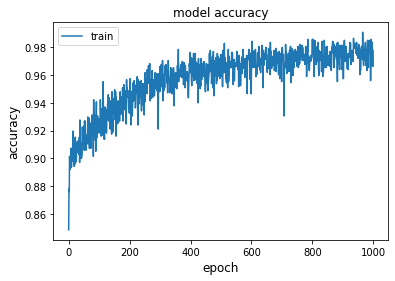

In [47]:
metric = 'accuracy'
plt.figure()
plt.plot(history.history[metric])
#plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

<hr>

#Evaluación

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score



In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(p, axis=-1)
y_true=np.argmax(y_test, axis=-1)

In [50]:
# Compute ROC curve and ROC area for each class
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], p[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), p.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

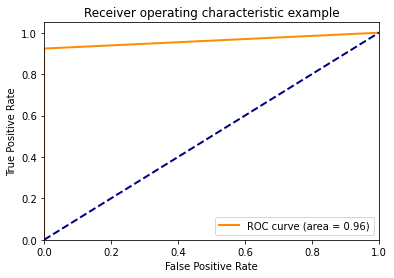

In [51]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

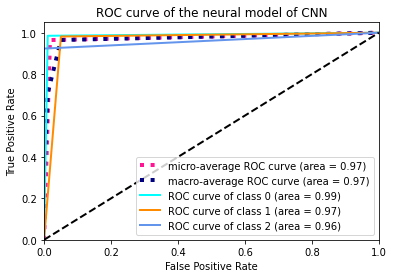

In [65]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(0,n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of the neural model of CNN")
plt.legend(loc="lower right")
plt.show()


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(p, axis=-1)
y_true=np.argmax(y_test, axis=-1)



In [54]:
p

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

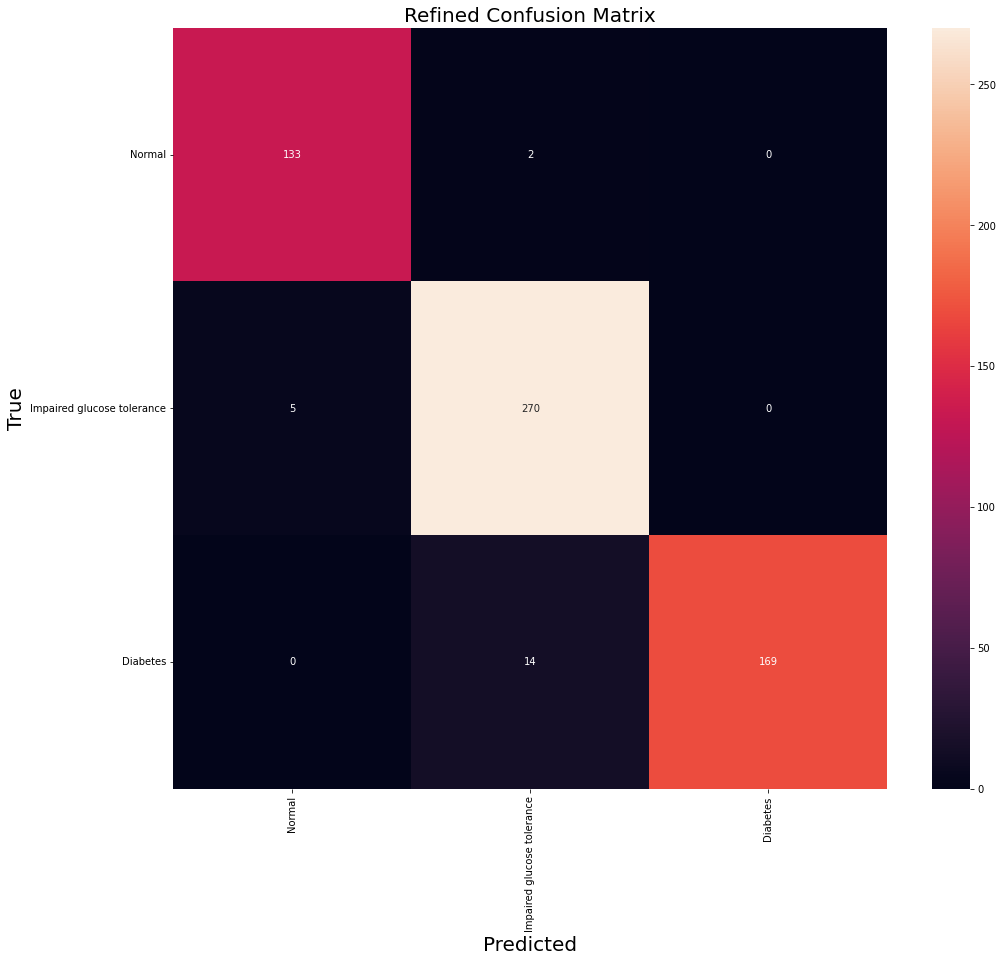

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

## Get Class Labels
#labels = le.classes_
class_names = ['Normal','Impaired glucose tolerance','Diabetes']

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [56]:
cm

array([[133,   2,   0],
       [  5, 270,   0],
       [  0,  14, 169]])

In [57]:
# Accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_true, y_pred )
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_true, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_true, y_pred, average=None)

In [58]:
# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(y_true, y_pred, average=None)

In [59]:
print(ac,recall,precision,f1)

0.9645868465430016 [0.98518519 0.98181818 0.92349727] [0.96376812 0.94405594 1.        ] [0.97435897 0.96256684 0.96022727]


#Test with real data

##healthy 0, glucose intolerance = 1, diabetes = 2

In [62]:
import numpy as np
patient_test = np.array(([ 82., 155.,  141. , 103. ,  96. ,  89. ,  89. , 89. ,  89., 89. ],
                         [ 82.,   118.,  140. , 148., 147.,  146.,  146.,  146.,  146., 146. ],
                         [ 92. , 133.,  72. , 87., 92.,  92. , 92., 92., 92., 92.],
                         [ 157. , 185.,  232. , 216., 197.,  192. , 192., 192., 192., 192.],
                         [ 70, 70, 148, 148, 116, 97, 97, 97, 97, 97 ] ,
                         [ 79, 79, 157, 157, 116, 84, 84, 84, 84, 84 ],
                         [ 82, 82, 94, 94, 102, 102, 102, 102, 102, 102 ] ,
                         [ 95, 95, 180, 180, 155, 155, 140, 140, 140, 140 ],
                         [ 84, 84, 84, 84, 164, 164, 164, 164, 164, 164 ],
                         [ 73, 73, 99, 99, 82, 82, 82, 82, 82, 82 ] , 
                         [ 61, 61, 94, 94, 90, 90, 90, 90, 90, 90 ],
                         [ 100, 100, 100, 100, 149, 149, 149, 149, 149, 149 ],
                         [ 63, 63, 63, 63, 87, 87, 87, 87, 87, 87 ] ,
                         [ 75, 75, 75, 75, 91, 91, 91, 91, 91, 91 ], 
                         [ 117, 117, 145, 145, 98, 98, 98, 98, 98, 98 ],
                         [ 120, 120, 120, 120, 136, 136, 136,136, 136, 136 ]
                         ))
#patient_test.reshape(1,4,10)
patient_test.shape
patient_test=patient_test.reshape(16,10,1)
patient_test.shape

(16, 10, 1)

In [63]:
predict = model.predict(patient_test)
print (predict)


1/1 [==============================] - 0s 26ms/step
[[9.9980044e-01 1.9968080e-04 3.7308015e-10]
 [3.9138723e-02 9.6085966e-01 1.7518363e-06]
 [9.5393234e-01 4.6067636e-02 1.3591600e-10]
 [0.0000000e+00 5.8110732e-08 9.9999994e-01]
 [5.0074536e-01 4.9924928e-01 5.2843438e-06]
 [9.1547891e-02 9.0844816e-01 3.9559036e-06]
 [9.9992007e-01 7.9884267e-05 1.1287354e-11]
 [1.8300606e-12 9.7874147e-01 2.1258522e-02]
 [7.5486021e-17 9.0556452e-03 9.9094439e-01]
 [9.9999422e-01 5.7331667e-06 5.1827781e-16]
 [9.9999744e-01 2.5415586e-06 2.2434165e-15]
 [5.3847139e-11 9.9903804e-01 9.6189033e-04]
 [9.9997526e-01 2.4720832e-05 1.8721876e-15]
 [9.9998599e-01 1.4004086e-05 2.5782404e-14]
 [1.4445119e-10 9.9999958e-01 3.3314737e-07]
 [5.5271785e-16 9.9999934e-01 5.7791289e-07]]


In [64]:
y_pred = np.argmax(predict, axis=-1)
y_pred 

array([0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1])

In [66]:
label = [0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1]

In [67]:

# Method 1: sklearn
from sklearn.metrics import f1_score
f1 =f1_score(label, y_pred, average=None)

In [68]:
print(ac,recall,precision,f1)

0.9645868465430016 [0.98518519 0.98181818 0.92349727] [0.96376812 0.94405594 1.        ] [0.94117647 0.83333333 0.66666667]
